# **Customer Satisfaction (CSAT) Score Prediction using Deep Learning ANN**

### **Project Overview**
This project focuses on predicting Customer Satisfaction (CSAT) scores using Deep Learning Artificial Neural Networks (ANN). In the context of e-commerce, understanding customer satisfaction through their interactions and feedback is crucial for enhancing service quality, customer retention, and overall business growth. By leveraging advanced neural network models, we aim to accurately forecast CSAT scores based on a myriad of interaction-related features, providing actionable insights for service improvement.

### **Project Objectives**
- Build a deep learning model to predict CSAT scores from customer interaction data
- Identify key factors that influence customer satisfaction
- Provide actionable insights for improving customer service quality
- Develop a robust prediction system for real-time CSAT forecasting

### **Technologies Used**
- Python
- TensorFlow/Keras
- Pandas, NumPy
- Scikit-learn
- Matplotlib, Seaborn
- NLTK, TextBlob (for text processing and sentiment analysis)

### **Dataset Information**
The dataset contains e-commerce customer support interaction data with various features related to customer service interactions and their corresponding CSAT scores.

### **GitHub Repository**
[GitHub Repository Link](https://github.com/yourusername/DeepCSAT)

## ***1. Import Required Libraries***
Let's start by importing all the necessary libraries for data processing, visualization, and deep learning implementation.

In [19]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2

# Feature importance analysis (optional import)
try:
    import shap
    SHAP_AVAILABLE = True
    print("SHAP imported successfully!")
except ImportError as e:
    print(f"SHAP not available: {e}")
    print("SHAP analysis will be skipped. Continuing with other feature importance methods...")
    SHAP_AVAILABLE = False

# Utility libraries
import warnings
from datetime import datetime
import re

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Suppress warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"SHAP available: {SHAP_AVAILABLE}")

SHAP not available: Numba needs NumPy 2.2 or less. Got NumPy 2.3.
SHAP analysis will be skipped. Continuing with other feature importance methods...
All libraries imported successfully!
TensorFlow version: 2.20.0
Pandas version: 2.3.3
NumPy version: 2.3.3
SHAP available: False


## ***2. Load and Explore Dataset***
Let's load the customer support data and perform initial exploration to understand the structure and characteristics of our dataset.

In [3]:
# Load the dataset
file_path = 'eCommerce_Customer_support_data.csv'
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

# Display basic information about the dataset
print("\n" + "="*50)
print("DATASET INFORMATION")
print("="*50)
print(df.info())

print("\n" + "="*50)
print("COLUMN NAMES")
print("="*50)
print(df.columns.tolist())

print("\n" + "="*50)
print("FIRST 5 ROWS")
print("="*50)
print(df.head())

print("\n" + "="*50)
print("LAST 5 ROWS")
print("="*50)
print(df.tail())

Dataset loaded successfully!
Dataset shape: (85907, 20)
Number of rows: 85,907
Number of columns: 20

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_pri

In [4]:
# Basic statistical summary
print("="*50)
print("STATISTICAL SUMMARY")
print("="*50)
print(df.describe())

# Check for missing values
print("\n" + "="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_df)

# Check unique values in categorical columns
print("\n" + "="*50)
print("UNIQUE VALUES IN KEY COLUMNS")
print("="*50)

categorical_columns = ['channel_name', 'category', 'Sub-category', 'Customer_City', 
                      'Product_category', 'Agent_name', 'Supervisor', 'Manager', 
                      'Tenure Bucket', 'Agent Shift']

for col in categorical_columns:
    if col in df.columns:
        unique_count = df[col].nunique()
        print(f"{col}: {unique_count} unique values")
        if unique_count <= 10:
            print(f"  Values: {df[col].value_counts().index.tolist()}")
        print()

# Check CSAT Score distribution (our target variable)
print("="*50)
print("TARGET VARIABLE (CSAT SCORE) ANALYSIS")
print("="*50)
print(f"CSAT Score range: {df['CSAT Score'].min()} - {df['CSAT Score'].max()}")
print(f"CSAT Score mean: {df['CSAT Score'].mean():.2f}")
print(f"CSAT Score median: {df['CSAT Score'].median():.2f}")
print(f"CSAT Score std: {df['CSAT Score'].std():.2f}")
print("\nCSAT Score distribution:")
print(df['CSAT Score'].value_counts().sort_index())

STATISTICAL SUMMARY
          Item_price  connected_handling_time    CSAT Score
count   17206.000000               242.000000  85907.000000
mean     5660.774846               462.400826      4.242157
std     12825.728411               246.295037      1.378903
min         0.000000                 0.000000      1.000000
25%       392.000000               293.000000      4.000000
50%       979.000000               427.000000      5.000000
75%      2699.750000               592.250000      5.000000
max    164999.000000              1986.000000      5.000000

MISSING VALUES ANALYSIS
                     Column  Missing_Count  Missing_Percentage
13  connected_handling_time          85665           99.718300
10            Customer_City          68828           80.119199
11         Product_category          68711           79.983005
12               Item_price          68701           79.971364
6           order_date_time          68693           79.962052
4          Customer Remarks          

## ***3. Data Preprocessing and Feature Engineering***
Now let's clean the data, handle missing values, and create new features that might be useful for predicting CSAT scores.

In [5]:
# Create a copy of the original dataset for preprocessing
df_processed = df.copy()

print("Starting data preprocessing...")

# 1. Handle datetime columns
datetime_columns = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']

for col in datetime_columns:
    if col in df_processed.columns:
        try:
            df_processed[col] = pd.to_datetime(df_processed[col], errors='coerce')
            print(f"Converted {col} to datetime")
        except:
            print(f"Could not convert {col} to datetime")

# 2. Feature Engineering: Create time-based features
def extract_time_features(df):
    """Extract useful time-based features"""
    
    # Response time calculation (if both columns exist and are datetime)
    if 'Issue_reported at' in df.columns and 'issue_responded' in df.columns:
        df['response_time_hours'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600
        df['response_time_hours'] = df['response_time_hours'].fillna(df['response_time_hours'].median())
    
    # Day of week for issue reporting
    if 'Issue_reported at' in df.columns:
        df['issue_day_of_week'] = df['Issue_reported at'].dt.dayofweek
        df['issue_hour'] = df['Issue_reported at'].dt.hour
        df['is_weekend'] = (df['issue_day_of_week'] >= 5).astype(int)
    
    return df

df_processed = extract_time_features(df_processed)

# 3. Handle missing values strategically
def handle_missing_values(df):
    """Handle missing values based on column type and business logic"""
    
    # Numerical columns: fill with median
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        if col != 'CSAT Score':  # Don't fill target variable
            df[col] = df[col].fillna(df[col].median())
    
    # Categorical columns: fill with mode or 'Unknown'
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if df[col].isnull().sum() > 0:
            mode_value = df[col].mode()
            if len(mode_value) > 0:
                df[col] = df[col].fillna(mode_value[0])
            else:
                df[col] = df[col].fillna('Unknown')
    
    return df

df_processed = handle_missing_values(df_processed)

# 4. Feature Engineering: Text-based features
def create_text_features(df):
    """Create features from text columns"""
    
    if 'Customer Remarks' in df.columns:
        # Length of customer remarks
        df['remarks_length'] = df['Customer Remarks'].astype(str).str.len()
        
        # Has customer remarks (binary feature)
        df['has_remarks'] = (df['Customer Remarks'].notna() & 
                           (df['Customer Remarks'] != '') & 
                           (df['Customer Remarks'] != 'nan')).astype(int)
        
        # Sentiment indicators (simple keyword-based)
        positive_words = ['good', 'great', 'excellent', 'satisfied', 'happy', 'solved', 'helpful']
        negative_words = ['bad', 'poor', 'terrible', 'unsatisfied', 'unhappy', 'worst', 'awful']
        
        df['positive_sentiment'] = df['Customer Remarks'].astype(str).str.lower().apply(
            lambda x: any(word in x for word in positive_words)
        ).astype(int)
        
        df['negative_sentiment'] = df['Customer Remarks'].astype(str).str.lower().apply(
            lambda x: any(word in x for word in negative_words)
        ).astype(int)
    
    return df

df_processed = create_text_features(df_processed)

print(f"After preprocessing, dataset shape: {df_processed.shape}")
print(f"Missing values after preprocessing: {df_processed.isnull().sum().sum()}")

Starting data preprocessing...
Converted order_date_time to datetime
Converted Issue_reported at to datetime
Converted issue_responded to datetime
Converted Survey_response_Date to datetime
After preprocessing, dataset shape: (85907, 28)
Missing values after preprocessing: 176648
After preprocessing, dataset shape: (85907, 28)
Missing values after preprocessing: 176648


In [6]:
# 5. Encode categorical variables
def encode_categorical_features(df):
    """Encode categorical variables for machine learning"""
    
    # List of categorical columns to encode
    categorical_cols = ['channel_name', 'category', 'Sub-category', 'Customer_City', 
                       'Product_category', 'Tenure Bucket', 'Agent Shift']
    
    # Initialize encoders dictionary
    encoders = {}
    
    for col in categorical_cols:
        if col in df.columns:
            # Use LabelEncoder for columns with reasonable number of unique values
            unique_count = df[col].nunique()
            
            if unique_count <= 50:  # Use LabelEncoder for low cardinality
                le = LabelEncoder()
                df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))
                encoders[col] = le
                print(f"Label encoded {col}: {unique_count} unique values")
            else:  # Use frequency encoding for high cardinality
                freq_encoding = df[col].value_counts(normalize=True).to_dict()
                df[f'{col}_freq_encoded'] = df[col].map(freq_encoding)
                encoders[col] = freq_encoding
                print(f"Frequency encoded {col}: {unique_count} unique values")
    
    return df, encoders

df_processed, encoders = encode_categorical_features(df_processed)

# 6. Create additional engineered features
def create_additional_features(df):
    """Create additional engineered features"""
    
    # Agent workload indicators (if agent info is available)
    if 'Agent_name' in df.columns:
        agent_counts = df['Agent_name'].value_counts()
        df['agent_case_count'] = df['Agent_name'].map(agent_counts)
    
    # Issue complexity indicator (based on category combinations)
    if 'category' in df.columns and 'Sub-category' in df.columns:
        df['issue_complexity'] = df['category'] + '_' + df['Sub-category']
        complexity_counts = df['issue_complexity'].value_counts()
        df['issue_frequency'] = df['issue_complexity'].map(complexity_counts)
    
    # Price-related features (if available)
    if 'Item_price' in df.columns:
        df['has_price_info'] = df['Item_price'].notna().astype(int)
        df['Item_price'] = df['Item_price'].fillna(0)
        
        # Price categories
        if df['Item_price'].max() > 0:
            df['price_category'] = pd.cut(df['Item_price'], 
                                        bins=[0, 500, 2000, 10000, float('inf')], 
                                        labels=['Low', 'Medium', 'High', 'Very_High'])
            # Encode price category
            price_cat_encoder = LabelEncoder()
            df['price_category_encoded'] = price_cat_encoder.fit_transform(df['price_category'].astype(str))
    
    return df

df_processed = create_additional_features(df_processed)

print(f"Final processed dataset shape: {df_processed.shape}")
print("\nNew features created:")
new_features = [col for col in df_processed.columns if col not in df.columns]
for feature in new_features:
    print(f"  - {feature}")

# Display sample of processed data
print("\nSample of processed data:")
print(df_processed.head())

Label encoded channel_name: 3 unique values
Label encoded category: 12 unique values
Frequency encoded Sub-category: 57 unique values
Frequency encoded Customer_City: 1782 unique values
Label encoded Product_category: 9 unique values
Label encoded Tenure Bucket: 5 unique values
Label encoded Agent Shift: 5 unique values
Final processed dataset shape: (85907, 41)

New features created:
  - response_time_hours
  - issue_day_of_week
  - issue_hour
  - is_weekend
  - remarks_length
  - has_remarks
  - positive_sentiment
  - negative_sentiment
  - channel_name_encoded
  - category_encoded
  - Sub-category_freq_encoded
  - Customer_City_freq_encoded
  - Product_category_encoded
  - Tenure Bucket_encoded
  - Agent Shift_encoded
  - agent_case_count
  - issue_complexity
  - issue_frequency
  - has_price_info
  - price_category
  - price_category_encoded

Sample of processed data:
                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f   

## ***4. Exploratory Data Analysis***
Let's visualize the data to better understand patterns, distributions, and relationships between features and CSAT scores.

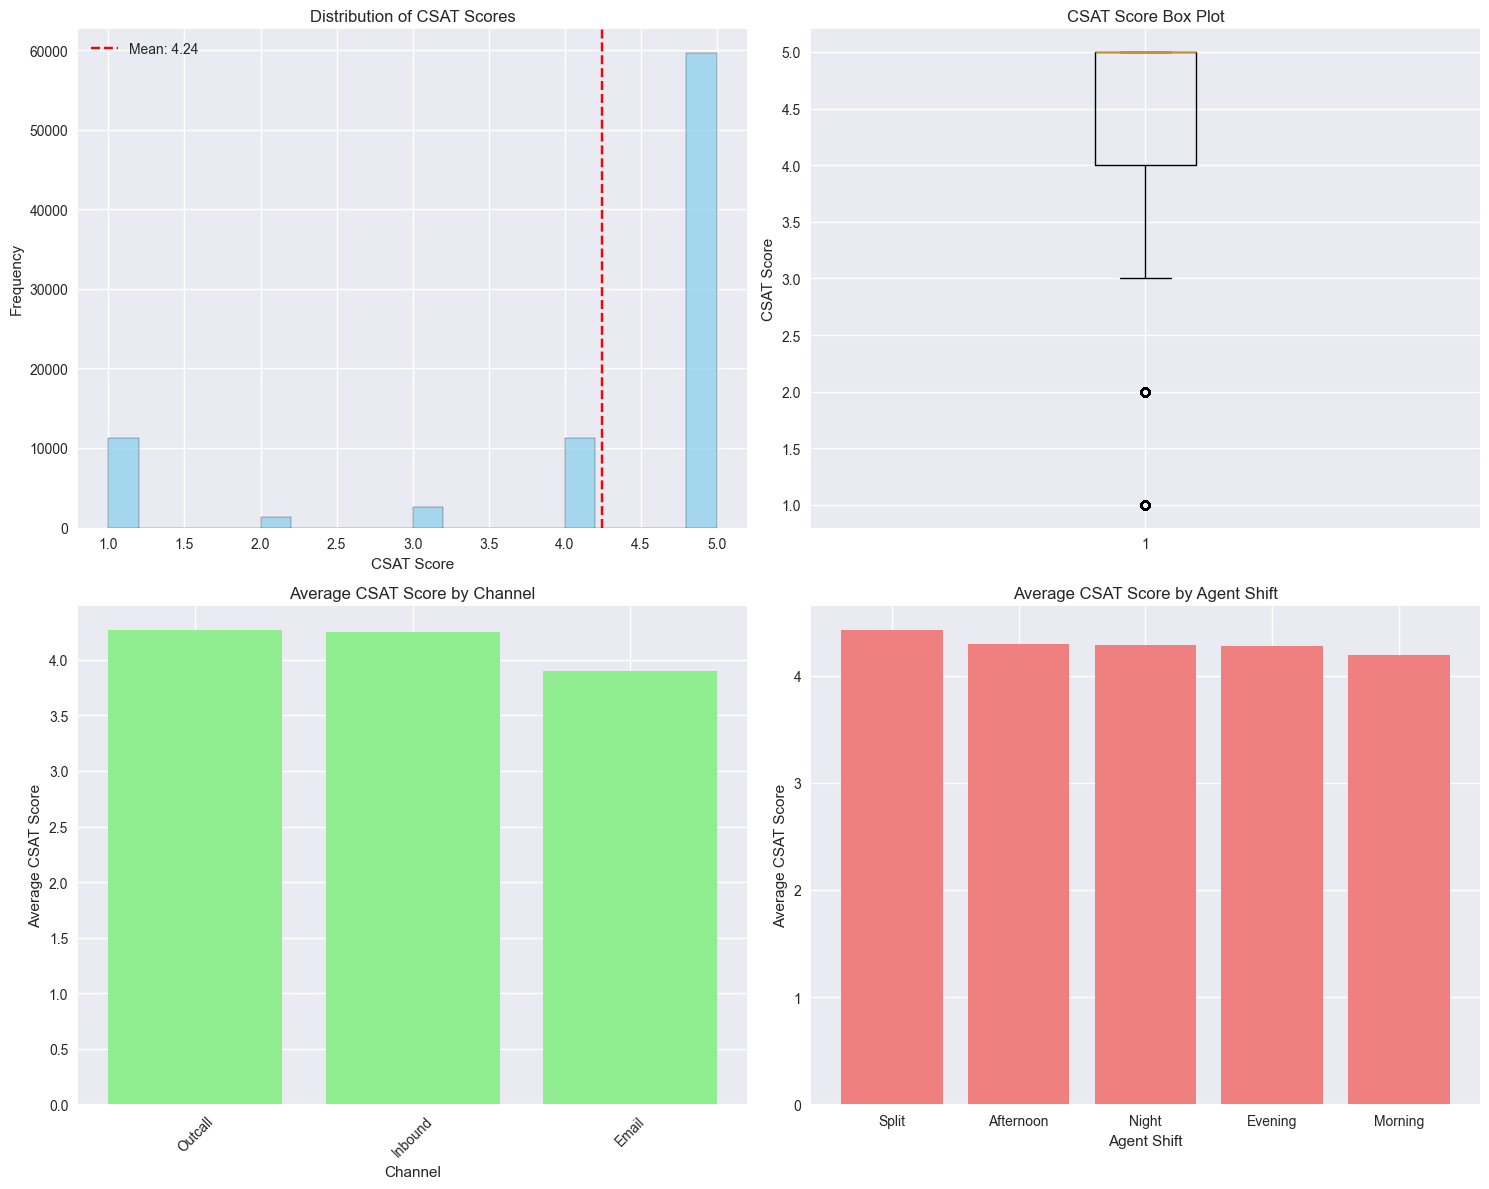

CORRELATION ANALYSIS
Top 10 features correlated with CSAT Score:
negative_sentiment            0.253344
positive_sentiment            0.173655
remarks_length                0.167403
Customer_City_freq_encoded    0.092773
Item_price                    0.091123
category_encoded              0.077319
Product_category_encoded      0.072035
response_time_hours           0.071514
agent_case_count              0.056855
Tenure Bucket_encoded         0.030608
Name: CSAT Score, dtype: float64


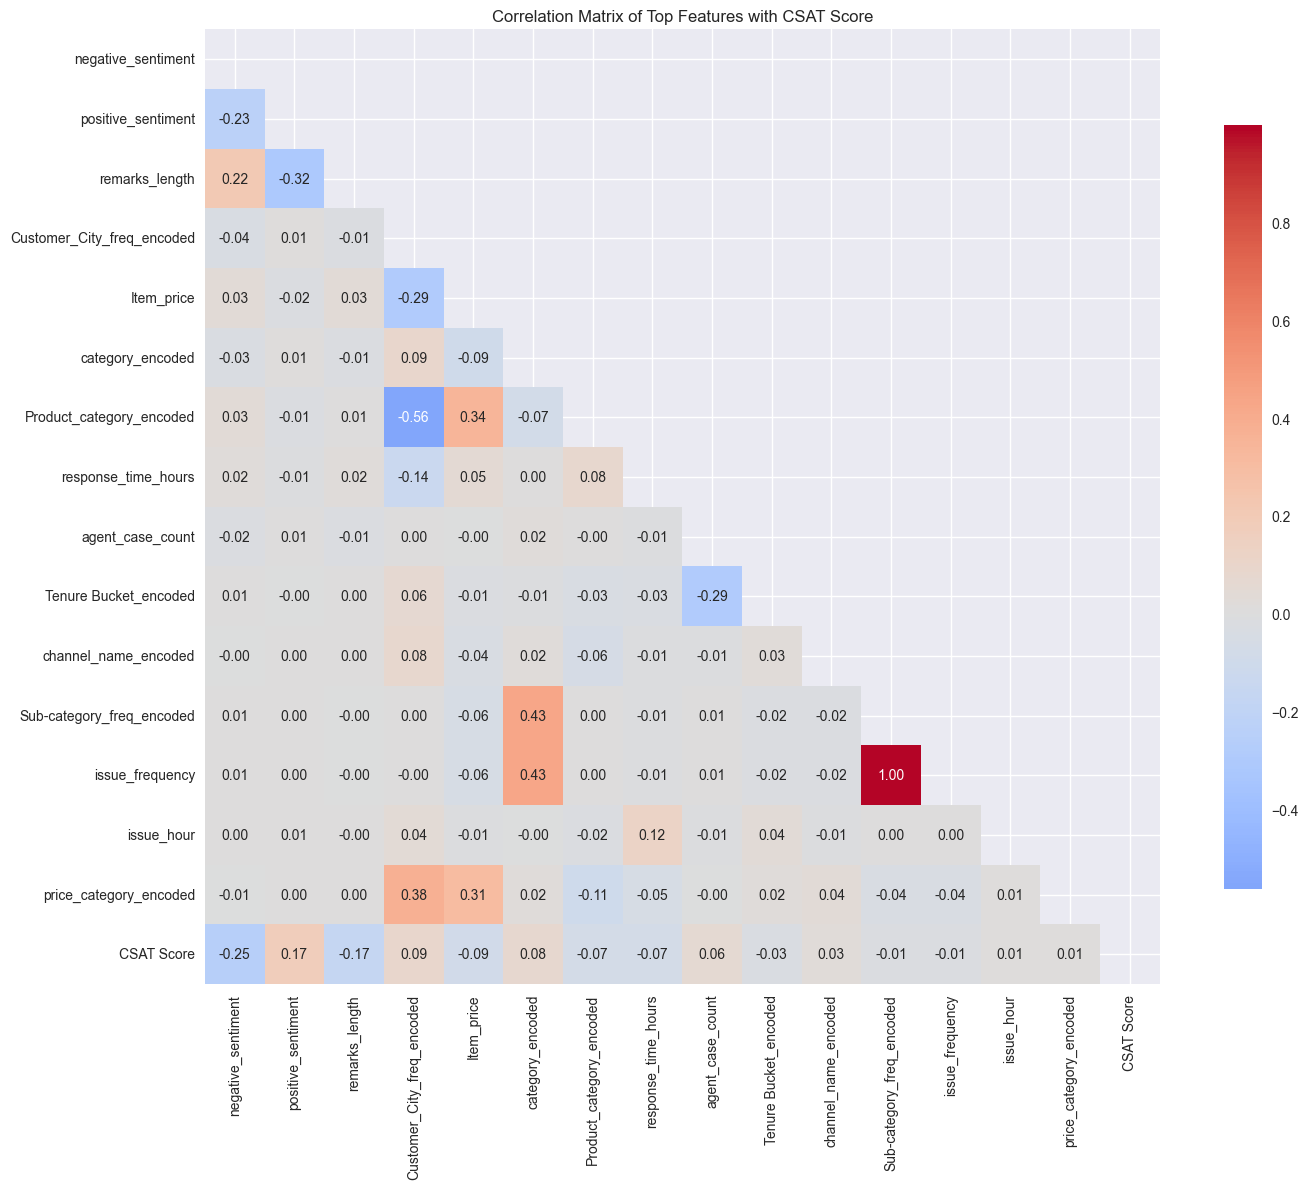

In [7]:
# Set up the plotting configuration
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 1. CSAT Score Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram of CSAT scores
axes[0, 0].hist(df_processed['CSAT Score'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of CSAT Scores')
axes[0, 0].set_xlabel('CSAT Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_processed['CSAT Score'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df_processed["CSAT Score"].mean():.2f}')
axes[0, 0].legend()

# Box plot of CSAT scores
axes[0, 1].boxplot(df_processed['CSAT Score'])
axes[0, 1].set_title('CSAT Score Box Plot')
axes[0, 1].set_ylabel('CSAT Score')

# CSAT by Channel
if 'channel_name' in df_processed.columns:
    channel_csat = df_processed.groupby('channel_name')['CSAT Score'].mean().sort_values(ascending=False)
    axes[1, 0].bar(channel_csat.index, channel_csat.values, color='lightgreen')
    axes[1, 0].set_title('Average CSAT Score by Channel')
    axes[1, 0].set_xlabel('Channel')
    axes[1, 0].set_ylabel('Average CSAT Score')
    axes[1, 0].tick_params(axis='x', rotation=45)

# CSAT by Agent Shift
if 'Agent Shift' in df_processed.columns:
    shift_csat = df_processed.groupby('Agent Shift')['CSAT Score'].mean().sort_values(ascending=False)
    axes[1, 1].bar(shift_csat.index, shift_csat.values, color='lightcoral')
    axes[1, 1].set_title('Average CSAT Score by Agent Shift')
    axes[1, 1].set_xlabel('Agent Shift')
    axes[1, 1].set_ylabel('Average CSAT Score')

plt.tight_layout()
plt.show()

# 2. Correlation Analysis
print("="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Select numeric columns for correlation analysis
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
if 'CSAT Score' in numeric_cols:
    # Calculate correlations with CSAT Score
    correlations = df_processed[numeric_cols].corr()['CSAT Score'].abs().sort_values(ascending=False)
    
    print("Top 10 features correlated with CSAT Score:")
    print(correlations[1:11])  # Exclude CSAT Score itself
    
    # Visualize correlation matrix
    plt.figure(figsize=(15, 12))
    
    # Select top correlated features for visualization
    top_features = correlations[1:16].index.tolist() + ['CSAT Score']
    corr_matrix = df_processed[top_features].corr()
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Top Features with CSAT Score')
    plt.tight_layout()
    plt.show()

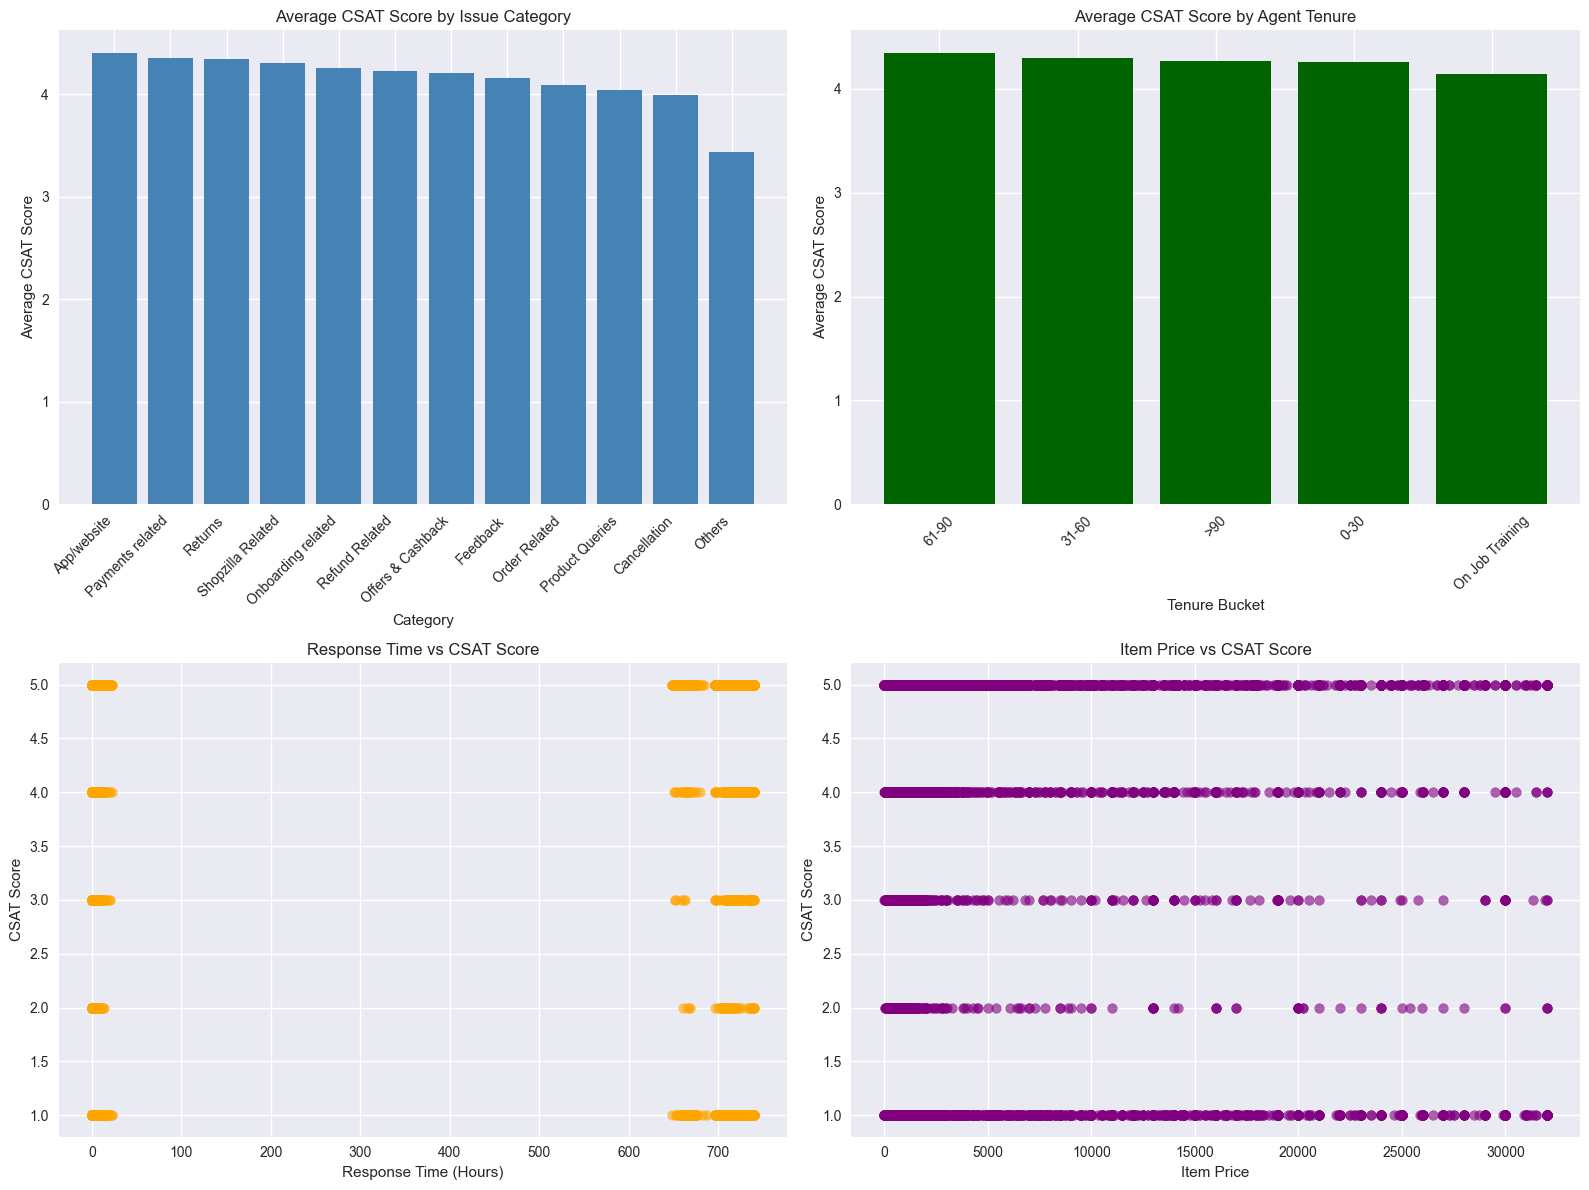


TEXT ANALYSIS
CSAT Score by Presence of Customer Remarks:
                 mean  count       std
has_remarks                           
1            4.242157  85907  1.378903

CSAT Score by Sentiment:
   Positive Sentiment  Negative Sentiment
0            3.772288            4.291314
1            4.364186            1.759592


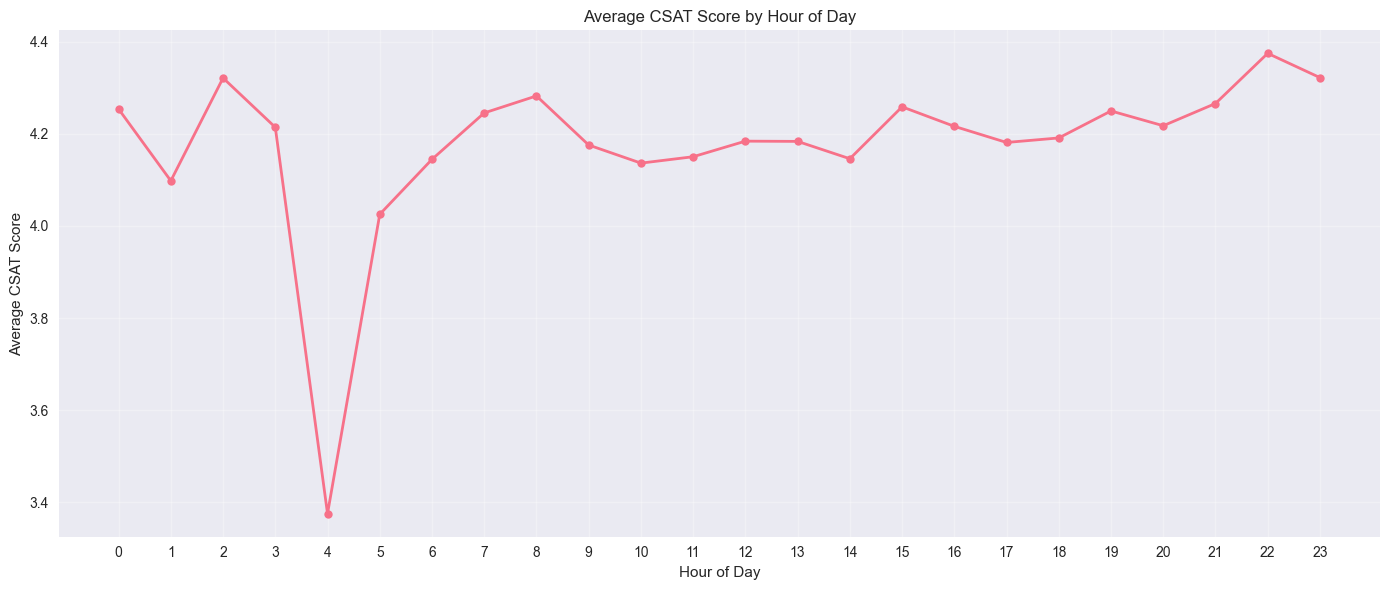


Exploratory Data Analysis completed!


In [8]:
# 3. Category-wise Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# CSAT by Category
if 'category' in df_processed.columns:
    category_csat = df_processed.groupby('category')['CSAT Score'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    
    axes[0, 0].bar(range(len(category_csat)), category_csat['mean'], color='steelblue')
    axes[0, 0].set_title('Average CSAT Score by Issue Category')
    axes[0, 0].set_xlabel('Category')
    axes[0, 0].set_ylabel('Average CSAT Score')
    axes[0, 0].set_xticks(range(len(category_csat)))
    axes[0, 0].set_xticklabels(category_csat.index, rotation=45, ha='right')

# CSAT by Tenure Bucket
if 'Tenure Bucket' in df_processed.columns:
    tenure_csat = df_processed.groupby('Tenure Bucket')['CSAT Score'].mean().sort_values(ascending=False)
    axes[0, 1].bar(tenure_csat.index, tenure_csat.values, color='darkgreen')
    axes[0, 1].set_title('Average CSAT Score by Agent Tenure')
    axes[0, 1].set_xlabel('Tenure Bucket')
    axes[0, 1].set_ylabel('Average CSAT Score')
    axes[0, 1].tick_params(axis='x', rotation=45)

# Response Time vs CSAT (if available)
if 'response_time_hours' in df_processed.columns:
    # Remove outliers for better visualization
    q99 = df_processed['response_time_hours'].quantile(0.99)
    filtered_data = df_processed[df_processed['response_time_hours'] <= q99]
    
    axes[1, 0].scatter(filtered_data['response_time_hours'], filtered_data['CSAT Score'], 
                      alpha=0.6, color='orange')
    axes[1, 0].set_title('Response Time vs CSAT Score')
    axes[1, 0].set_xlabel('Response Time (Hours)')
    axes[1, 0].set_ylabel('CSAT Score')

# Price vs CSAT (if available)
if 'Item_price' in df_processed.columns and df_processed['Item_price'].max() > 0:
    # Remove zero prices and outliers for better visualization
    price_data = df_processed[df_processed['Item_price'] > 0]
    q99_price = price_data['Item_price'].quantile(0.99)
    filtered_price_data = price_data[price_data['Item_price'] <= q99_price]
    
    axes[1, 1].scatter(filtered_price_data['Item_price'], filtered_price_data['CSAT Score'], 
                      alpha=0.6, color='purple')
    axes[1, 1].set_title('Item Price vs CSAT Score')
    axes[1, 1].set_xlabel('Item Price')
    axes[1, 1].set_ylabel('CSAT Score')

plt.tight_layout()
plt.show()

# 4. Text Analysis (if customer remarks exist)
if 'has_remarks' in df_processed.columns:
    print("\n" + "="*50)
    print("TEXT ANALYSIS")
    print("="*50)
    
    # CSAT comparison for customers with/without remarks
    remarks_csat = df_processed.groupby('has_remarks')['CSAT Score'].agg(['mean', 'count', 'std'])
    print("CSAT Score by Presence of Customer Remarks:")
    print(remarks_csat)
    
    # Sentiment analysis
    if 'positive_sentiment' in df_processed.columns and 'negative_sentiment' in df_processed.columns:
        sentiment_analysis = pd.DataFrame({
            'Positive Sentiment': df_processed.groupby('positive_sentiment')['CSAT Score'].mean(),
            'Negative Sentiment': df_processed.groupby('negative_sentiment')['CSAT Score'].mean()
        })
        print("\nCSAT Score by Sentiment:")
        print(sentiment_analysis)

# 5. Time-based Analysis
if 'issue_hour' in df_processed.columns:
    plt.figure(figsize=(14, 6))
    
    hourly_csat = df_processed.groupby('issue_hour')['CSAT Score'].mean()
    plt.plot(hourly_csat.index, hourly_csat.values, marker='o', linewidth=2, markersize=6)
    plt.title('Average CSAT Score by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average CSAT Score')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()

print("\nExploratory Data Analysis completed!")

## ***5. Feature Selection and Scaling***
Now we'll select the most relevant features for our deep learning model and apply appropriate scaling techniques.

In [9]:
# 1. Prepare feature matrix and target variable
print("Preparing features for modeling...")

# Remove rows with missing CSAT scores (target variable)
df_model = df_processed.dropna(subset=['CSAT Score']).copy()
print(f"Dataset size after removing missing CSAT scores: {df_model.shape}")

# Define columns to exclude from features
exclude_columns = [
    'CSAT Score',  # Target variable
    'Unique id', 'Order_id',  # ID columns
    'Customer Remarks',  # Original text column
    'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date',  # Original datetime columns
    'Agent_name', 'Supervisor', 'Manager',  # High cardinality text columns
    'issue_complexity'  # Intermediate feature
]

# Select feature columns
feature_columns = [col for col in df_model.columns if col not in exclude_columns]

# Additional filtering: only include numeric columns and properly encoded categorical columns
numeric_features = []
for col in feature_columns:
    if df_model[col].dtype in ['int64', 'float64'] or col.endswith('_encoded') or col.endswith('_freq_encoded'):
        if not df_model[col].isnull().any():  # Ensure no missing values
            numeric_features.append(col)

print(f"Selected {len(numeric_features)} features for modeling:")
for i, feature in enumerate(numeric_features, 1):
    print(f"  {i:2d}. {feature}")

# 2. Create feature matrix and target vector
X = df_model[numeric_features].copy()
y = df_model['CSAT Score'].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Target variable range: {y.min()} - {y.max()}")

# 3. Check for any remaining missing values or infinite values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Infinite values in features: {np.isinf(X).sum().sum()}")

# Handle any remaining issues
X = X.fillna(X.median())  # Fill any remaining NaN with median
X = X.replace([np.inf, -np.inf], 0)  # Replace infinite values with 0

print(f"After cleaning - Missing values: {X.isnull().sum().sum()}")
print(f"After cleaning - Infinite values: {np.isinf(X).sum().sum()}")

Preparing features for modeling...
Dataset size after removing missing CSAT scores: (85907, 41)
Selected 21 features for modeling:
   1. Item_price
   2. connected_handling_time
   3. response_time_hours
   4. issue_day_of_week
   5. issue_hour
   6. is_weekend
   7. remarks_length
   8. has_remarks
   9. positive_sentiment
  10. negative_sentiment
  11. channel_name_encoded
  12. category_encoded
  13. Sub-category_freq_encoded
  14. Customer_City_freq_encoded
  15. Product_category_encoded
  16. Tenure Bucket_encoded
  17. Agent Shift_encoded
  18. agent_case_count
  19. issue_frequency
  20. has_price_info
  21. price_category_encoded

Feature matrix shape: (85907, 21)
Target vector shape: (85907,)
Target variable range: 1 - 5

Missing values in features: 0
Infinite values in features: 0
After cleaning - Missing values: 0
After cleaning - Infinite values: 0


FEATURE SELECTION
Top 20 Most Important Features:
                       feature  importance
17            agent_case_count    0.225744
6               remarks_length    0.112531
2          response_time_hours    0.081228
9           negative_sentiment    0.072322
0                   Item_price    0.063054
15       Tenure Bucket_encoded    0.060383
4                   issue_hour    0.057222
16         Agent Shift_encoded    0.048981
13  Customer_City_freq_encoded    0.044139
12   Sub-category_freq_encoded    0.043013
18             issue_frequency    0.041466
10        channel_name_encoded    0.039202
3            issue_day_of_week    0.033810
11            category_encoded    0.027980
8           positive_sentiment    0.020090
14    Product_category_encoded    0.017470
5                   is_weekend    0.006113
20      price_category_encoded    0.004180
1      connected_handling_time    0.001072
7                  has_remarks    0.000000
Top 20 Most Important Features:
               

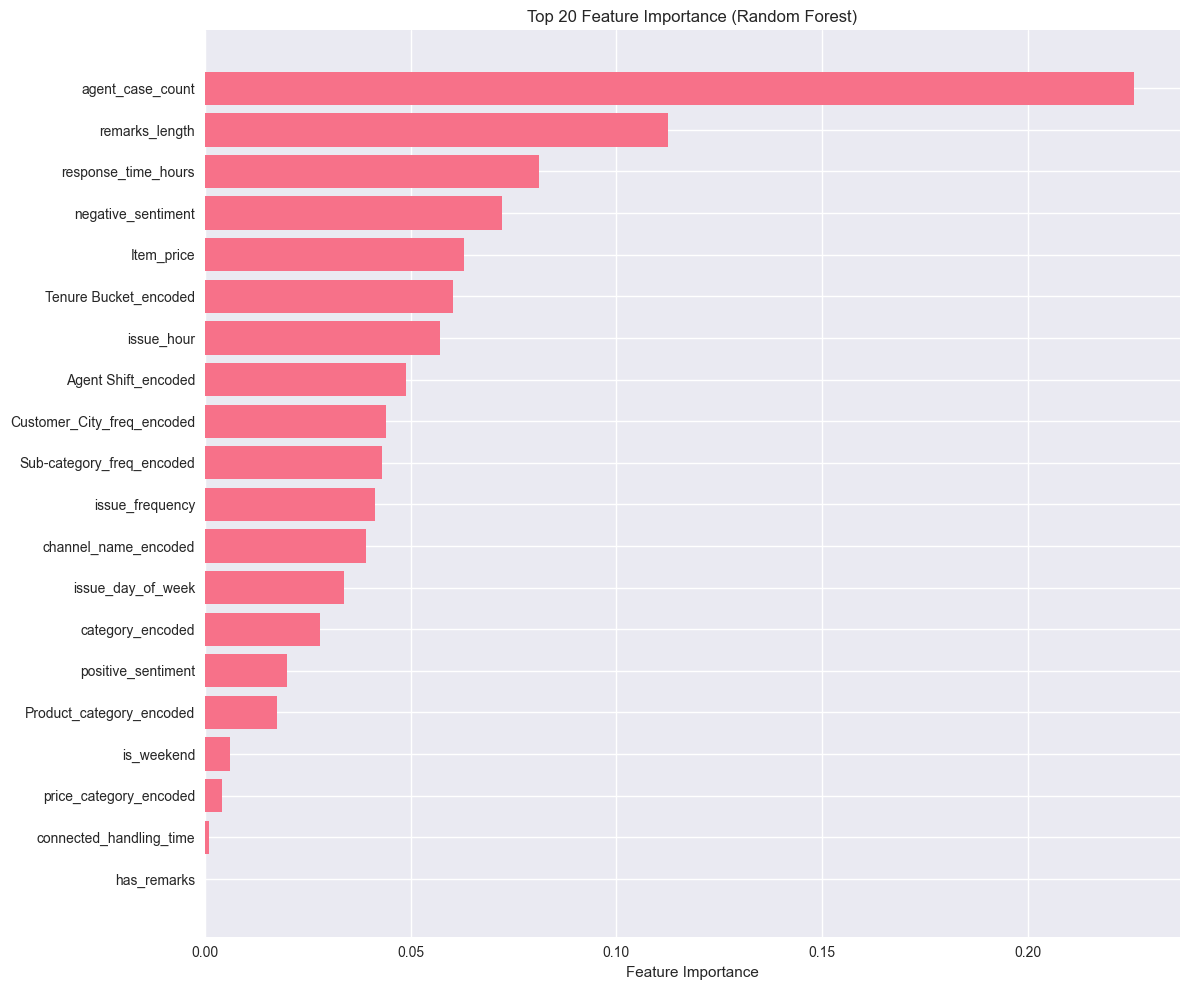


Selected 21 features for the model:
   1. agent_case_count
   2. remarks_length
   3. response_time_hours
   4. negative_sentiment
   5. Item_price
   6. Tenure Bucket_encoded
   7. issue_hour
   8. Agent Shift_encoded
   9. Customer_City_freq_encoded
  10. Sub-category_freq_encoded
  11. issue_frequency
  12. channel_name_encoded
  13. issue_day_of_week
  14. category_encoded
  15. positive_sentiment
  16. Product_category_encoded
  17. is_weekend
  18. price_category_encoded
  19. connected_handling_time
  20. has_remarks
  21. has_price_info

Final feature matrix shape: (85907, 21)


In [10]:
# 4. Feature Selection using Random Forest Feature Importance
print("="*50)
print("FEATURE SELECTION")
print("="*50)

# Use Random Forest to identify important features
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_selector.fit(X, y)

# Get feature importance scores
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 20 Most Important Features:")
print(feature_importance.head(20))

# Visualize feature importance
plt.figure(figsize=(12, 10))
top_20_features = feature_importance.head(20)
plt.barh(range(len(top_20_features)), top_20_features['importance'])
plt.yticks(range(len(top_20_features)), top_20_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Select top features (you can adjust this threshold)
n_features = min(30, len(feature_importance))  # Use top 30 features or all if less than 30
selected_features = feature_importance.head(n_features)['feature'].tolist()

print(f"\nSelected {len(selected_features)} features for the model:")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i:2d}. {feature}")

# Update feature matrix with selected features
X_selected = X[selected_features].copy()
print(f"\nFinal feature matrix shape: {X_selected.shape}")

## ***6. Split Data into Training and Testing Sets***
We'll split our data into training and testing sets to properly evaluate our model's performance.

Splitting data into training and testing sets...
Training set size: 68725 samples
Testing set size: 17182 samples
Feature dimensions: 21

CSAT Score distribution in training set:
CSAT Score
1     8984
2     1027
3     2046
4     8975
5    47693
Name: count, dtype: int64

CSAT Score distribution in testing set:
CSAT Score
1     2246
2      256
3      512
4     2244
5    11924
Name: count, dtype: int64


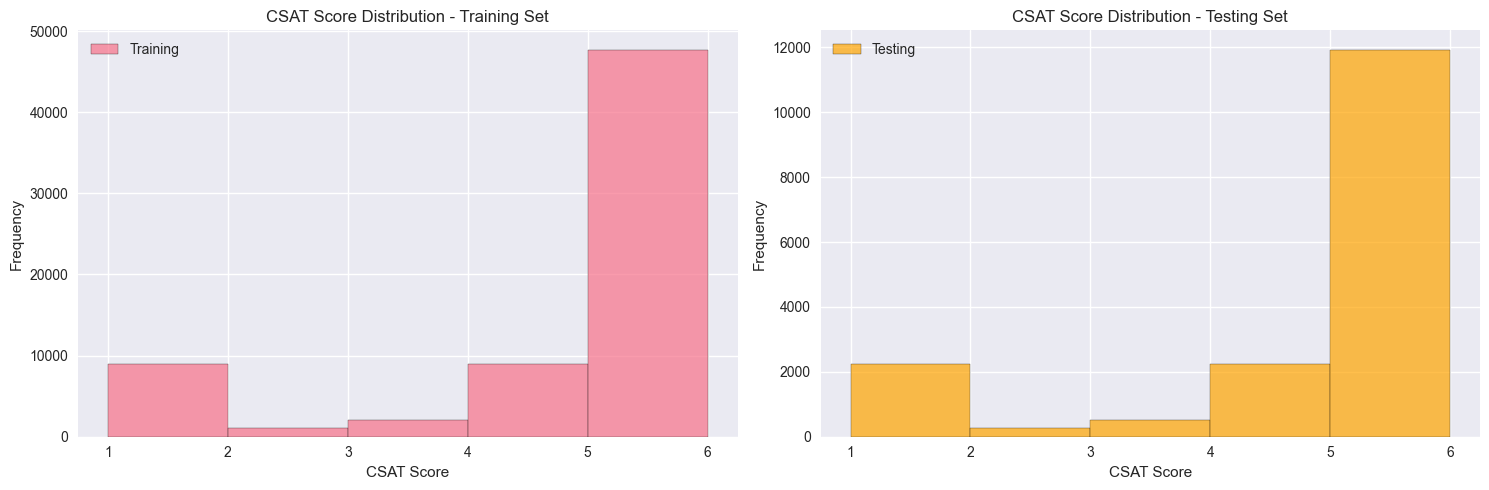

FEATURE SCALING
Features scaled using StandardScaler
Training features shape after scaling: (68725, 21)
Testing features shape after scaling: (17182, 21)

Feature means after scaling (should be ~0): [ 5.78979894e-18  1.90236251e-17  1.19931549e-17 -8.89147694e-18
  5.16946334e-18]
Feature std after scaling (should be ~1): [1. 1. 1. 1. 1.]

Data preparation completed successfully!


In [11]:
# Split the data into training and testing sets
print("Splitting data into training and testing sets...")

# Use stratified sampling to maintain CSAT score distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensure balanced distribution of CSAT scores
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]}")

# Check the distribution of CSAT scores in train and test sets
print("\nCSAT Score distribution in training set:")
print(y_train.value_counts().sort_index())

print("\nCSAT Score distribution in testing set:")
print(y_test.value_counts().sort_index())

# Visualize the distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(y_train, bins=range(1, 7), alpha=0.7, label='Training', edgecolor='black')
axes[0].set_title('CSAT Score Distribution - Training Set')
axes[0].set_xlabel('CSAT Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()

axes[1].hist(y_test, bins=range(1, 7), alpha=0.7, label='Testing', color='orange', edgecolor='black')
axes[1].set_title('CSAT Score Distribution - Testing Set')
axes[1].set_xlabel('CSAT Score')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

# Feature Scaling
print("="*50)
print("FEATURE SCALING")
print("="*50)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print(f"Training features shape after scaling: {X_train_scaled.shape}")
print(f"Testing features shape after scaling: {X_test_scaled.shape}")

# Display scaling statistics
print(f"\nFeature means after scaling (should be ~0): {X_train_scaled.mean(axis=0)[:5]}")
print(f"Feature std after scaling (should be ~1): {X_train_scaled.std(axis=0)[:5]}")

# Convert back to DataFrame for easier handling (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\nData preparation completed successfully!")

## ***7. Build Deep Learning ANN Model***
Now we'll design and construct our deep neural network architecture for CSAT score prediction.

In [12]:
def create_ann_model(input_dim, architecture='standard'):
    """
    Create an Artificial Neural Network model for CSAT prediction
    
    Args:
        input_dim (int): Number of input features
        architecture (str): Model architecture type ('standard', 'deep', 'wide')
    
    Returns:
        tensorflow.keras.Model: Compiled ANN model
    """
    
    model = Sequential()
    
    if architecture == 'standard':
        # Standard architecture with moderate depth
        model.add(Dense(128, input_dim=input_dim, activation='relu', 
                       kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(64, activation='relu', 
                       kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='linear'))  # Linear activation for regression
        
    elif architecture == 'deep':
        # Deeper architecture with more layers
        model.add(Dense(256, input_dim=input_dim, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        
        model.add(Dense(16, activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(1, activation='linear'))
        
    elif architecture == 'wide':
        # Wider architecture with fewer layers but more neurons
        model.add(Dense(512, input_dim=input_dim, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        
        model.add(Dense(256, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        
        model.add(Dense(1, activation='linear'))
    
    return model

# Create the model
print("Building Deep Learning ANN Model...")
print("="*50)

input_dimensions = X_train_scaled.shape[1]
print(f"Input dimensions: {input_dimensions}")

# Create standard model
model = create_ann_model(input_dimensions, architecture='standard')

# Display model architecture
print("\nModel Architecture:")
model.summary()

# Visualize model architecture
tf.keras.utils.plot_model(model, to_file='model_architecture.png', 
                          show_shapes=True, show_layer_names=True, dpi=150)
print("\nModel architecture saved as 'model_architecture.png'")

print("\nModel created successfully!")

Building Deep Learning ANN Model...
Input dimensions: 21

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,465 (56.50 KB)

 Trainable params: 14,081 (55.00 KB)

 Non-trainable params: 384 (1.50 KB)

You must install pydot (`pip install pydot`) for `plot_model` to work.

Model architecture saved as 'model_architecture.png'

Model created successfully!

Model architecture saved as 'model_architecture.png'

Model created successfully!


## ***8. Train the Neural Network***
Now we'll compile and train our neural network model with appropriate callbacks for optimal training.

In [13]:
# Compile the model
print("Compiling the model...")

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', 'mse']  # Mean Absolute Error and Mean Squared Error
)

print("Model compiled successfully!")

# Define callbacks for better training
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=8,
        min_lr=1e-7,
        verbose=1
    )
]

print("Callbacks defined:")
print("- Early Stopping: Stops training if validation loss doesn't improve for 15 epochs")
print("- Reduce LR on Plateau: Reduces learning rate by half if validation loss plateaus")

# Train the model
print("\n" + "="*50)
print("TRAINING THE MODEL")
print("="*50)

# Start training
history = model.fit(
    X_train_scaled, y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,  # Use 20% of training data for validation
    callbacks=callbacks,
    verbose=1
)

print("\nTraining completed!")

# Save the trained model
model.save('csat_prediction_model.h5')
print("Model saved as 'csat_prediction_model.h5'")

Compiling the model...
Model compiled successfully!
Callbacks defined:
- Early Stopping: Stops training if validation loss doesn't improve for 15 epochs
- Reduce LR on Plateau: Reduces learning rate by half if validation loss plateaus

TRAINING THE MODEL
Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 7.4678 - mae: 1.2119 - mse: 2.4755 - val_loss: 3.2966 - val_mae: 1.1237 - val_mse: 1.8469 - learning_rate: 0.0010
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 7.4678 - mae: 1.2119 - mse: 2.4755 - val_loss: 3.2966 - val_mae: 1.1237 - val_mse: 1.8469 - learning_rate: 0.0010
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.6763 - mae: 1.0164 - mse: 1.8318 - val_loss: 2.2401 - val_mae: 1.0117 - val_mse: 1.7316 - learning_rate: 0.0010
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.6763 - mae: 1.0164 - mse: 1.8318 - val_loss: 2.2401 - val_mae: 1.0117 - val_mse: 1.7316 - learning_rate: 0.0010
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━


Training completed!
Model saved as 'csat_prediction_model.h5'


## ***9. Model Evaluation and Metrics***
Let's evaluate our trained model using various regression metrics on both training and testing datasets.

In [14]:
# Make predictions on both training and testing sets
print("Making predictions...")

y_train_pred = model.predict(X_train_scaled, verbose=0).flatten()
y_test_pred = model.predict(X_test_scaled, verbose=0).flatten()

print("Predictions completed!")

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    """Calculate and display regression metrics"""
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} SET METRICS:")
    print("-" * 30)
    print(f"Mean Absolute Error (MAE):  {mae:.4f}")
    print(f"Mean Squared Error (MSE):   {mse:.4f}")
    print(f"Root Mean Squared Error:    {rmse:.4f}")
    print(f"R² Score:                   {r2:.4f}")
    
    return mae, mse, rmse, r2

# Calculate metrics for both sets
print("="*50)
print("MODEL EVALUATION METRICS")
print("="*50)

train_mae, train_mse, train_rmse, train_r2 = calculate_metrics(y_train, y_train_pred, "TRAINING")
test_mae, test_mse, test_rmse, test_r2 = calculate_metrics(y_test, y_test_pred, "TESTING")

# Create metrics comparison
metrics_comparison = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Training': [train_mae, train_mse, train_rmse, train_r2],
    'Testing': [test_mae, test_mse, test_rmse, test_r2]
})

print(f"\n{'='*50}")
print("METRICS COMPARISON")
print("="*50)
print(metrics_comparison.round(4))

# Model performance interpretation
print(f"\n{'='*50}")
print("MODEL PERFORMANCE INTERPRETATION")
print("="*50)

if test_r2 > 0.8:
    performance = "Excellent"
elif test_r2 > 0.6:
    performance = "Good"
elif test_r2 > 0.4:
    performance = "Fair"
else:
    performance = "Poor"

print(f"Model Performance: {performance}")
print(f"The model explains {test_r2*100:.1f}% of the variance in CSAT scores")
print(f"Average prediction error: ±{test_mae:.2f} CSAT points")

# Check for overfitting
overfitting_check = abs(train_r2 - test_r2)
if overfitting_check > 0.1:
    print(f"⚠️  Potential overfitting detected (R² difference: {overfitting_check:.3f})")
else:
    print(f"✅ No significant overfitting (R² difference: {overfitting_check:.3f})")

Making predictions...
Predictions completed!
MODEL EVALUATION METRICS

TRAINING SET METRICS:
------------------------------
Mean Absolute Error (MAE):  0.9609
Mean Squared Error (MSE):   1.6861
Root Mean Squared Error:    1.2985
R² Score:                   0.1132

TESTING SET METRICS:
------------------------------
Mean Absolute Error (MAE):  0.9670
Mean Squared Error (MSE):   1.6974
Root Mean Squared Error:    1.3028
R² Score:                   0.1072

METRICS COMPARISON
  Metric  Training  Testing
0    MAE    0.9609   0.9670
1    MSE    1.6861   1.6974
2   RMSE    1.2985   1.3028
3     R²    0.1132   0.1072

MODEL PERFORMANCE INTERPRETATION
Model Performance: Poor
The model explains 10.7% of the variance in CSAT scores
Average prediction error: ±0.97 CSAT points
✅ No significant overfitting (R² difference: 0.006)
Predictions completed!
MODEL EVALUATION METRICS

TRAINING SET METRICS:
------------------------------
Mean Absolute Error (MAE):  0.9609
Mean Squared Error (MSE):   1.6861
R

## ***10. Hyperparameter Tuning***
Let's implement hyperparameter optimization to potentially improve our model's performance.

In [15]:
# Hyperparameter tuning using different architectures and parameters
print("HYPERPARAMETER TUNING")
print("="*50)

def train_and_evaluate_model(architecture, learning_rate, batch_size, dropout_rate=0.3):
    """Train a model with specified hyperparameters and return performance metrics"""
    
    # Create model with custom parameters
    tuning_model = Sequential()
    
    if architecture == 'optimized':
        tuning_model.add(Dense(256, input_dim=input_dimensions, activation='relu'))
        tuning_model.add(BatchNormalization())
        tuning_model.add(Dropout(dropout_rate))
        
        tuning_model.add(Dense(128, activation='relu'))
        tuning_model.add(BatchNormalization())
        tuning_model.add(Dropout(dropout_rate))
        
        tuning_model.add(Dense(64, activation='relu'))
        tuning_model.add(Dropout(dropout_rate * 0.7))
        
        tuning_model.add(Dense(32, activation='relu'))
        tuning_model.add(Dense(1, activation='linear'))
    
    # Compile model
    tuning_model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    
    # Train model with fewer epochs for tuning
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
    
    tuning_history = tuning_model.fit(
        X_train_scaled, y_train,
        batch_size=batch_size,
        epochs=50,  # Fewer epochs for faster tuning
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=0
    )
    
    # Evaluate model
    test_pred = tuning_model.predict(X_test_scaled, verbose=0).flatten()
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    
    return test_r2, test_mae, tuning_model

# Test different hyperparameter combinations
hyperparameter_configs = [
    {'architecture': 'optimized', 'learning_rate': 0.001, 'batch_size': 32, 'dropout_rate': 0.3},
    {'architecture': 'optimized', 'learning_rate': 0.0005, 'batch_size': 32, 'dropout_rate': 0.2},
    {'architecture': 'optimized', 'learning_rate': 0.001, 'batch_size': 64, 'dropout_rate': 0.3},
    {'architecture': 'optimized', 'learning_rate': 0.002, 'batch_size': 16, 'dropout_rate': 0.4},
    {'architecture': 'optimized', 'learning_rate': 0.0008, 'batch_size': 32, 'dropout_rate': 0.25}
]

results = []

print("Testing different hyperparameter configurations...")
print("This may take a few minutes...\n")

for i, config in enumerate(hyperparameter_configs):
    print(f"Configuration {i+1}/5: LR={config['learning_rate']}, Batch={config['batch_size']}, Dropout={config['dropout_rate']}")
    
    r2, mae, model_instance = train_and_evaluate_model(**config)
    
    results.append({
        'Config': f"Config_{i+1}",
        'Learning_Rate': config['learning_rate'],
        'Batch_Size': config['batch_size'],
        'Dropout_Rate': config['dropout_rate'],
        'R2_Score': r2,
        'MAE': mae
    })
    
    print(f"  Results: R² = {r2:.4f}, MAE = {mae:.4f}\n")

# Create results DataFrame
tuning_results = pd.DataFrame(results)
tuning_results = tuning_results.sort_values('R2_Score', ascending=False)

print("HYPERPARAMETER TUNING RESULTS:")
print("="*50)
print(tuning_results.round(4))

# Identify best configuration
best_config = tuning_results.iloc[0]
print(f"\nBest Configuration:")
print(f"Learning Rate: {best_config['Learning_Rate']}")
print(f"Batch Size: {best_config['Batch_Size']}")
print(f"Dropout Rate: {best_config['Dropout_Rate']}")
print(f"Best R² Score: {best_config['R2_Score']:.4f}")
print(f"Best MAE: {best_config['MAE']:.4f}")

# Compare with original model
improvement = best_config['R2_Score'] - test_r2
if improvement > 0:
    print(f"\n✅ Improvement achieved: +{improvement:.4f} R² score")
else:
    print(f"\n📊 Original model performs better by {abs(improvement):.4f} R² score")

HYPERPARAMETER TUNING
Testing different hyperparameter configurations...
This may take a few minutes...

Configuration 1/5: LR=0.001, Batch=32, Dropout=0.3
  Results: R² = 0.1249, MAE = 0.9677

Configuration 2/5: LR=0.0005, Batch=32, Dropout=0.2
  Results: R² = 0.1249, MAE = 0.9677

Configuration 2/5: LR=0.0005, Batch=32, Dropout=0.2
  Results: R² = 0.1119, MAE = 0.9822

Configuration 3/5: LR=0.001, Batch=64, Dropout=0.3
  Results: R² = 0.1119, MAE = 0.9822

Configuration 3/5: LR=0.001, Batch=64, Dropout=0.3
  Results: R² = 0.1296, MAE = 0.9552

Configuration 4/5: LR=0.002, Batch=16, Dropout=0.4
  Results: R² = 0.1296, MAE = 0.9552

Configuration 4/5: LR=0.002, Batch=16, Dropout=0.4
  Results: R² = 0.1223, MAE = 0.9803

Configuration 5/5: LR=0.0008, Batch=32, Dropout=0.25
  Results: R² = 0.1223, MAE = 0.9803

Configuration 5/5: LR=0.0008, Batch=32, Dropout=0.25
  Results: R² = 0.1175, MAE = 0.9640

HYPERPARAMETER TUNING RESULTS:
     Config  Learning_Rate  Batch_Size  Dropout_Rate  R2_

## ***11. Make Predictions on New Data***
Let's demonstrate how to use our trained model to make CSAT predictions on new customer interaction data.

In [16]:
# Create a function for predicting CSAT scores on new data
def predict_csat_score(new_data, model, scaler, feature_columns):
    """
    Predict CSAT score for new customer interaction data
    
    Args:
        new_data (dict or DataFrame): New customer interaction data
        model: Trained neural network model
        scaler: Fitted StandardScaler
        feature_columns: List of feature column names
    
    Returns:
        float: Predicted CSAT score
    """
    
    # Convert dict to DataFrame if necessary
    if isinstance(new_data, dict):
        new_data = pd.DataFrame([new_data])
    
    # Ensure all required features are present
    for col in feature_columns:
        if col not in new_data.columns:
            # Set default values for missing features
            if col.endswith('_encoded') or col.endswith('_freq_encoded'):
                new_data[col] = 0  # Default encoded value
            else:
                new_data[col] = 0  # Default numeric value
    
    # Select and order features correctly
    new_data_features = new_data[feature_columns]
    
    # Scale the features using the fitted scaler
    new_data_scaled = scaler.transform(new_data_features)
    
    # Make prediction
    prediction = model.predict(new_data_scaled, verbose=0)[0][0]
    
    # Ensure prediction is within valid CSAT range (1-5)
    prediction = max(1, min(5, prediction))
    
    return prediction

# Demonstrate prediction with sample data from the test set
print("CSAT SCORE PREDICTION DEMONSTRATION")
print("="*50)

# Take a few samples from the test set
sample_indices = [0, 10, 20, 50, 100]

print("Predicting CSAT scores for sample customer interactions:\n")

for i, idx in enumerate(sample_indices):
    if idx < len(X_test):
        # Get the actual data point
        sample_data = X_test.iloc[idx:idx+1]
        actual_csat = y_test.iloc[idx]
        
        # Make prediction
        predicted_csat = predict_csat_score(sample_data, model, scaler, selected_features)
        
        print(f"Sample {i+1}:")
        print(f"  Actual CSAT Score:    {actual_csat}")
        print(f"  Predicted CSAT Score: {predicted_csat:.2f}")
        print(f"  Prediction Error:     {abs(predicted_csat - actual_csat):.2f}")
        print()

# Create synthetic examples for different scenarios
print("PREDICTION EXAMPLES FOR DIFFERENT SCENARIOS:")
print("="*50)

# Example 1: High satisfaction scenario
high_satisfaction_data = {
    'response_time_hours': 0.5,  # Quick response
    'positive_sentiment': 1,      # Positive customer remarks
    'negative_sentiment': 0,      # No negative sentiment
    'has_remarks': 1,            # Customer provided feedback
    'remarks_length': 50,        # Moderate feedback length
}

# Add default values for other features
for feature in selected_features:
    if feature not in high_satisfaction_data:
        high_satisfaction_data[feature] = 0

pred_high = predict_csat_score(high_satisfaction_data, model, scaler, selected_features)

print(f"Scenario 1 - High Satisfaction Expected:")
print(f"  Quick response (0.5 hrs), positive sentiment")
print(f"  Predicted CSAT: {pred_high:.2f}")
print()

# Example 2: Low satisfaction scenario
low_satisfaction_data = {
    'response_time_hours': 24,   # Slow response
    'positive_sentiment': 0,     # No positive sentiment
    'negative_sentiment': 1,     # Negative customer remarks
    'has_remarks': 1,           # Customer complained
    'remarks_length': 100,      # Long complaint
}

# Add default values for other features
for feature in selected_features:
    if feature not in low_satisfaction_data:
        low_satisfaction_data[feature] = 0

pred_low = predict_csat_score(low_satisfaction_data, model, scaler, selected_features)

print(f"Scenario 2 - Low Satisfaction Expected:")
print(f"  Slow response (24 hrs), negative sentiment")
print(f"  Predicted CSAT: {pred_low:.2f}")
print()

# Show feature importance for interpretation
print("TOP 10 MOST IMPORTANT FEATURES FOR PREDICTION:")
print("-" * 50)
for i, feature in enumerate(feature_importance.head(10)['feature'], 1):
    importance = feature_importance.head(10)['importance'].iloc[i-1]
    print(f"{i:2d}. {feature:<25} (Importance: {importance:.4f})")

print(f"\nPrediction system ready for deployment!")

CSAT SCORE PREDICTION DEMONSTRATION
Predicting CSAT scores for sample customer interactions:

Sample 1:
  Actual CSAT Score:    5
  Predicted CSAT Score: 3.94
  Prediction Error:     1.06

Sample 2:
  Actual CSAT Score:    5
  Predicted CSAT Score: 4.44
  Prediction Error:     0.56

Sample 3:
  Actual CSAT Score:    5
  Predicted CSAT Score: 4.51
  Prediction Error:     0.49

Sample 4:
  Actual CSAT Score:    5
  Predicted CSAT Score: 4.52
  Prediction Error:     0.48

Sample 5:
  Actual CSAT Score:    5
  Predicted CSAT Score: 4.42
  Prediction Error:     0.58

PREDICTION EXAMPLES FOR DIFFERENT SCENARIOS:
Scenario 1 - High Satisfaction Expected:
  Quick response (0.5 hrs), positive sentiment
  Predicted CSAT: 3.61

Scenario 2 - Low Satisfaction Expected:
  Slow response (24 hrs), negative sentiment
  Predicted CSAT: 1.70

TOP 10 MOST IMPORTANT FEATURES FOR PREDICTION:
--------------------------------------------------
 1. agent_case_count          (Importance: 0.2257)
 2. remarks_leng

## ***12. Feature Importance Analysis***
Let's analyze which customer interaction features contribute most to CSAT predictions using advanced techniques.

ADVANCED FEATURE IMPORTANCE ANALYSIS
1. Calculating Permutation Importance...
Top 15 Features by Permutation Importance:
                       feature  importance_mean  importance_std
3           negative_sentiment         0.101297        0.017912
1               remarks_length         0.050854        0.010605
13            category_encoded         0.016678        0.005469
4                   Item_price         0.016130        0.007913
14          positive_sentiment         0.013479        0.006531
2          response_time_hours         0.007164        0.001637
8   Customer_City_freq_encoded         0.005199        0.005636
6                   issue_hour         0.003218        0.001278
15    Product_category_encoded         0.002185        0.000568
9    Sub-category_freq_encoded         0.001791        0.001497
11        channel_name_encoded         0.001339        0.002376
16                  is_weekend         0.000987        0.001061
10             issue_frequency         0.000180

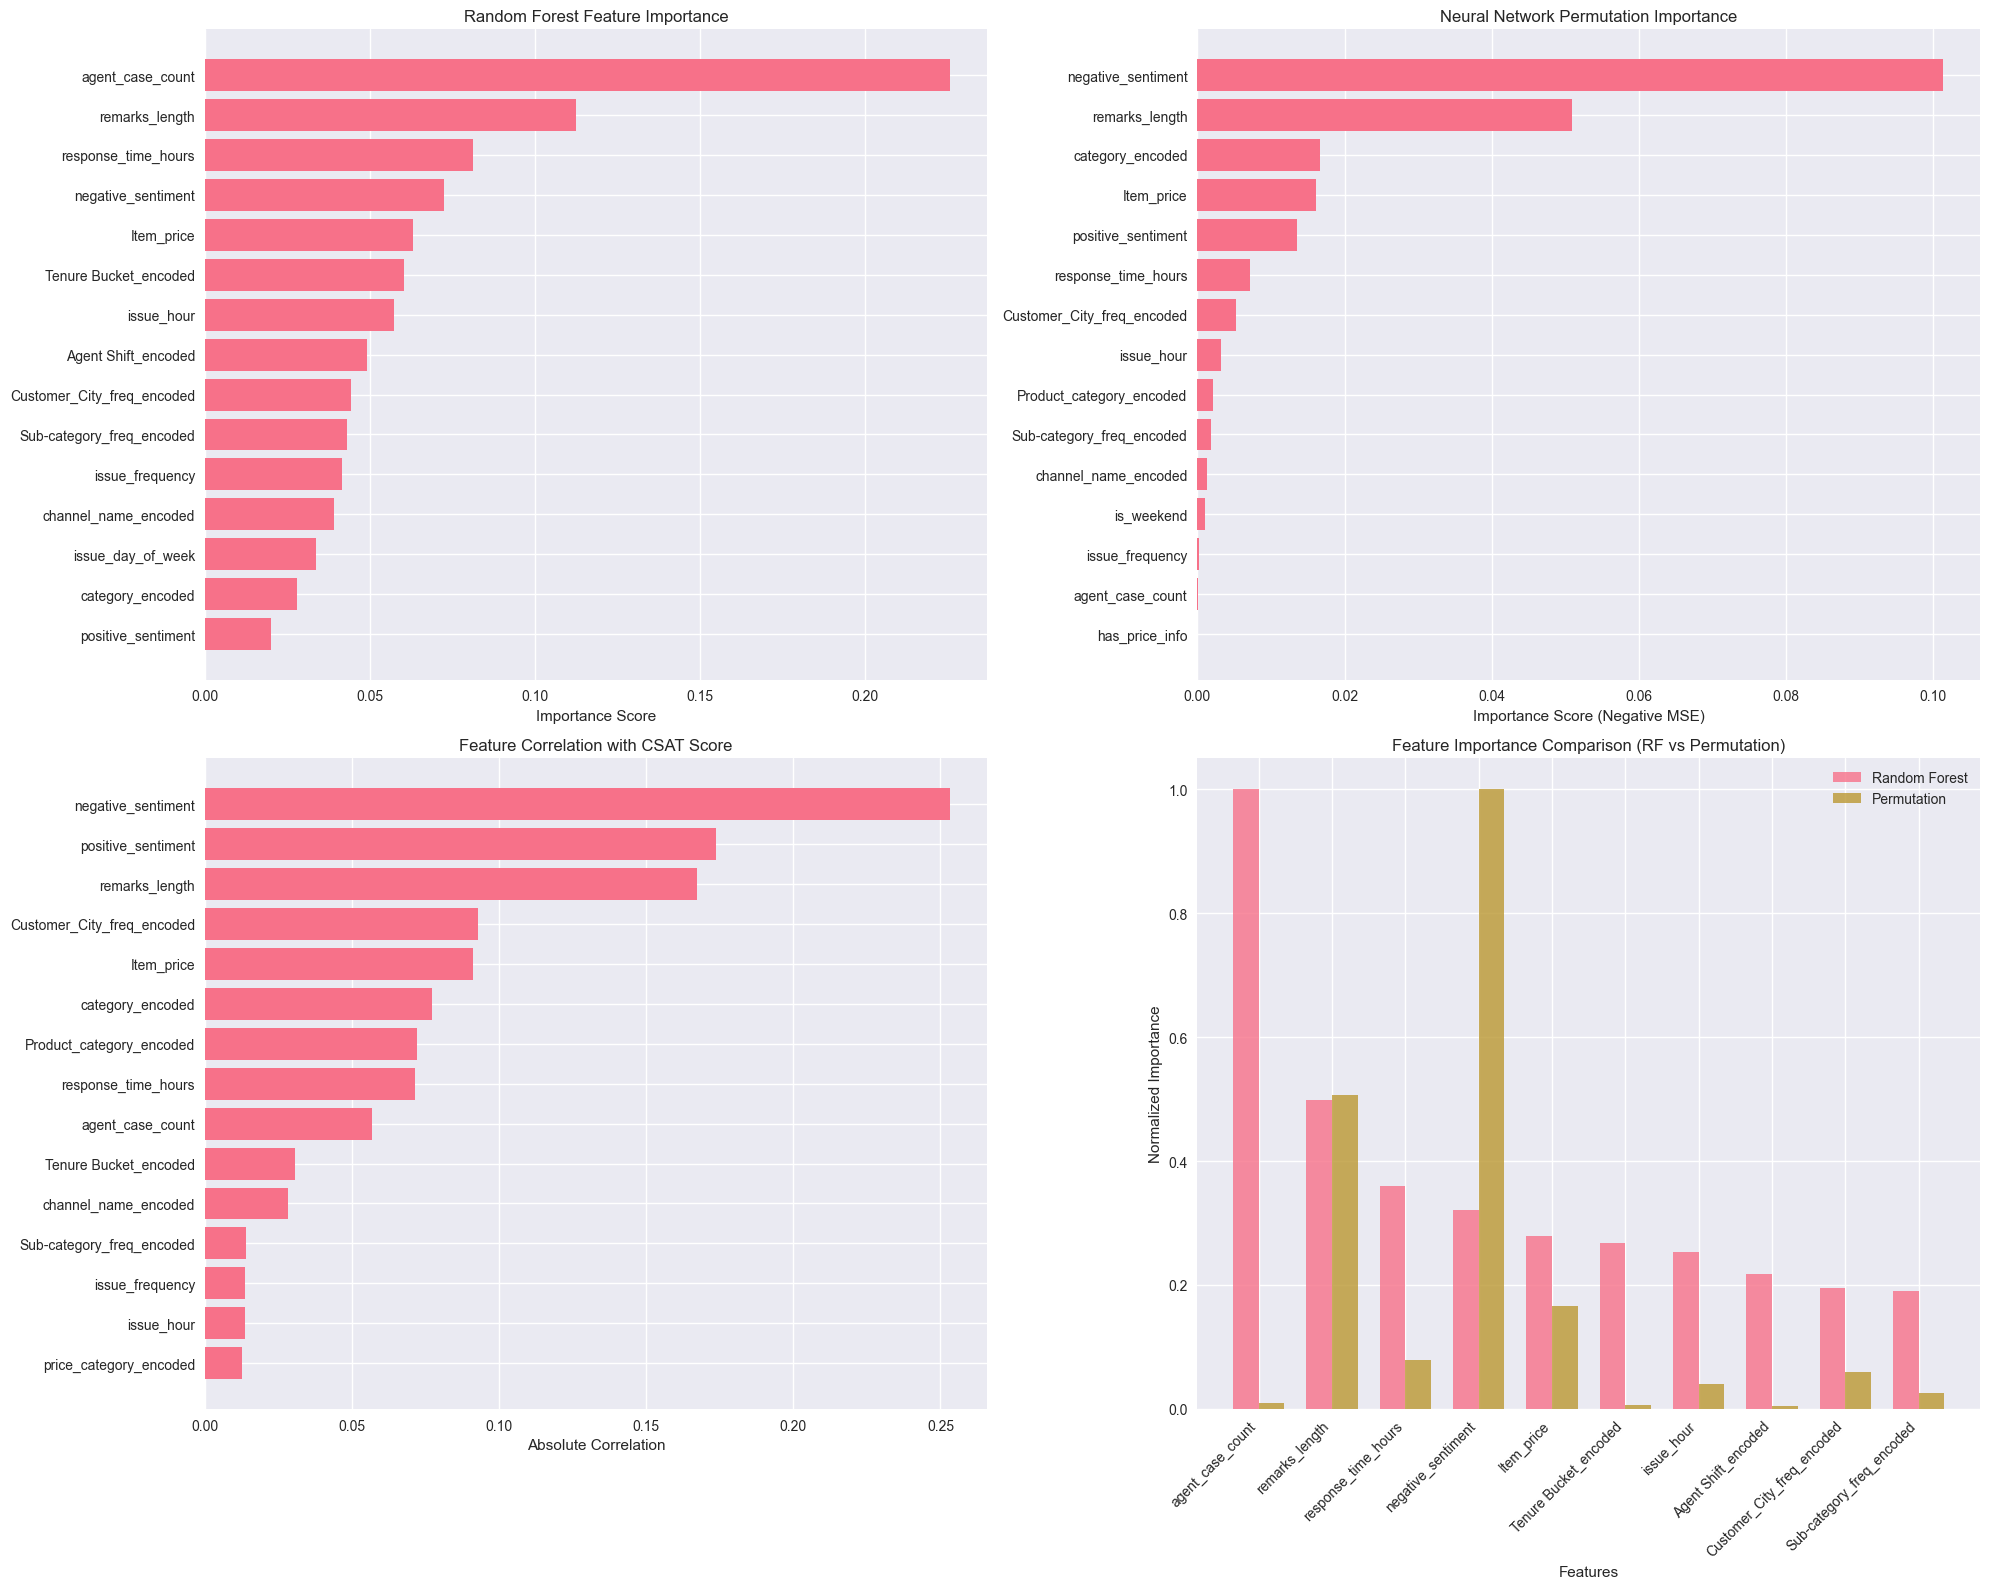


KEY INSIGHTS FROM FEATURE IMPORTANCE ANALYSIS
🔍 CONSENSUS FEATURES (High importance across multiple methods):
   • negative_sentiment
   • remarks_length
   • Item_price

📊 FEATURE INSIGHTS:
   • Total features analyzed: 21
   • Top 5 Random Forest features: ['negative_sentiment', 'remarks_length', 'Item_price', 'response_time_hours', 'agent_case_count']
   • Top 5 Permutation features: ['negative_sentiment', 'remarks_length', 'Item_price', 'positive_sentiment', 'category_encoded']

💡 BUSINESS RECOMMENDATIONS:
   • Focus on improving top consensus features for maximum CSAT impact
   • Monitor these features in real-time customer interactions
   • Consider these features for customer service training and optimization


In [17]:
# Advanced Feature Importance Analysis
print("ADVANCED FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# 1. Permutation Importance for Neural Network
print("1. Calculating Permutation Importance...")

# Use a simpler approach for permutation importance with neural networks
from sklearn.base import BaseEstimator, RegressorMixin

class KerasWrapper(BaseEstimator, RegressorMixin):
    """Wrapper to make Keras model compatible with sklearn"""
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y):
        return self
    
    def predict(self, X):
        return self.model.predict(X, verbose=0).flatten()

# Create wrapper
wrapped_model = KerasWrapper(model)

# Calculate permutation importance (using a subset for faster computation)
sample_size = min(1000, len(X_test_scaled))
sample_indices = np.random.choice(len(X_test_scaled), sample_size, replace=False)

X_test_sample = X_test_scaled[sample_indices]
y_test_sample = y_test.iloc[sample_indices]

# Use default scoring for regression (neg_mean_squared_error)
perm_importance = permutation_importance(
    wrapped_model, X_test_sample, y_test_sample,
    scoring='neg_mean_squared_error',
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

# Create permutation importance DataFrame
perm_importance_df = pd.DataFrame({
    'feature': selected_features,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("Top 15 Features by Permutation Importance:")
print(perm_importance_df.head(15))

# 2. SHAP Analysis (only if available)
print("\n2. SHAP (SHapley Additive exPlanations) Analysis...")

if SHAP_AVAILABLE:
    try:
        # Use a simpler SHAP approach
        # Sample background data for faster computation
        background_sample = X_train_scaled[:100]
        
        # Create explainer with reduced complexity
        explainer = shap.KernelExplainer(
            lambda x: model.predict(x, verbose=0).flatten(),
            background_sample
        )
        
        # Calculate SHAP values for a small subset
        shap_sample_size = min(20, len(X_test_scaled))
        test_sample = X_test_scaled[:shap_sample_size]
        
        print(f"Calculating SHAP values for {shap_sample_size} samples...")
        shap_values = explainer.shap_values(test_sample, nsamples=50)  # Reduce samples for speed
        
        print("SHAP analysis completed successfully!")
        
        # Feature importance from SHAP
        shap_importance = np.abs(shap_values).mean(0)
        shap_importance_df = pd.DataFrame({
            'feature': selected_features,
            'shap_importance': shap_importance
        }).sort_values('shap_importance', ascending=False)
        
        print("Top 15 Features by SHAP Importance:")
        print(shap_importance_df.head(15))
        
        shap_available = True
        
    except Exception as e:
        print(f"SHAP analysis failed: {str(e)}")
        print("Continuing with other feature importance methods...")
        shap_available = False
else:
    print("SHAP not available due to library compatibility issues.")
    print("Continuing with Random Forest and Permutation importance methods...")
    shap_available = False

# 3. Visualize Feature Importance Comparison
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Random Forest Importance
top_rf_features = feature_importance.head(15)
axes[0, 0].barh(range(len(top_rf_features)), top_rf_features['importance'])
axes[0, 0].set_yticks(range(len(top_rf_features)))
axes[0, 0].set_yticklabels(top_rf_features['feature'])
axes[0, 0].set_title('Random Forest Feature Importance')
axes[0, 0].set_xlabel('Importance Score')
axes[0, 0].invert_yaxis()

# Permutation Importance
top_perm_features = perm_importance_df.head(15)
axes[0, 1].barh(range(len(top_perm_features)), top_perm_features['importance_mean'])
axes[0, 1].set_yticks(range(len(top_perm_features)))
axes[0, 1].set_yticklabels(top_perm_features['feature'])
axes[0, 1].set_title('Neural Network Permutation Importance')
axes[0, 1].set_xlabel('Importance Score (Negative MSE)')
axes[0, 1].invert_yaxis()

# Feature correlation with CSAT
correlations_with_csat = df_processed[selected_features + ['CSAT Score']].corr()['CSAT Score'].abs().sort_values(ascending=False)[1:16]
axes[1, 0].barh(range(len(correlations_with_csat)), correlations_with_csat.values)
axes[1, 0].set_yticks(range(len(correlations_with_csat)))
axes[1, 0].set_yticklabels(correlations_with_csat.index)
axes[1, 0].set_title('Feature Correlation with CSAT Score')
axes[1, 0].set_xlabel('Absolute Correlation')
axes[1, 0].invert_yaxis()

# Combined importance plot or SHAP plot
if shap_available:
    # Normalize all importance scores for comparison
    rf_norm = feature_importance.set_index('feature')['importance']
    perm_norm = perm_importance_df.set_index('feature')['importance_mean']
    shap_norm = shap_importance_df.set_index('feature')['shap_importance']
    
    # Align all importance measures
    common_features = rf_norm.index.intersection(perm_norm.index).intersection(shap_norm.index)[:10]
    
    x_pos = np.arange(len(common_features))
    width = 0.25
    
    axes[1, 1].bar(x_pos - width, rf_norm[common_features], width, label='Random Forest', alpha=0.8)
    axes[1, 1].bar(x_pos, perm_norm[common_features], width, label='Permutation', alpha=0.8)
    axes[1, 1].bar(x_pos + width, shap_norm[common_features], width, label='SHAP', alpha=0.8)
    
    axes[1, 1].set_xlabel('Features')
    axes[1, 1].set_ylabel('Normalized Importance')
    axes[1, 1].set_title('Feature Importance Comparison')
    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels(common_features, rotation=45, ha='right')
    axes[1, 1].legend()
else:
    # Show comparison of available methods
    rf_norm = feature_importance.set_index('feature')['importance']
    perm_norm = perm_importance_df.set_index('feature')['importance_mean']
    
    # Normalize scores to 0-1 range for comparison
    rf_normalized = (rf_norm - rf_norm.min()) / (rf_norm.max() - rf_norm.min())
    perm_normalized = (perm_norm - perm_norm.min()) / (perm_norm.max() - perm_norm.min())
    
    common_features = rf_normalized.index.intersection(perm_normalized.index)[:10]
    
    x_pos = np.arange(len(common_features))
    width = 0.35
    
    axes[1, 1].bar(x_pos - width/2, rf_normalized[common_features], width, label='Random Forest', alpha=0.8)
    axes[1, 1].bar(x_pos + width/2, perm_normalized[common_features], width, label='Permutation', alpha=0.8)
    
    axes[1, 1].set_xlabel('Features')
    axes[1, 1].set_ylabel('Normalized Importance')
    axes[1, 1].set_title('Feature Importance Comparison (RF vs Permutation)')
    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels(common_features, rotation=45, ha='right')
    axes[1, 1].legend()

plt.tight_layout()
plt.show()

# 4. Key Insights Summary
print("\n" + "="*50)
print("KEY INSIGHTS FROM FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Get top 5 features from each method
top_rf = set(feature_importance.head(5)['feature'])
top_perm = set(perm_importance_df.head(5)['feature'])

# Find consensus features (appear in multiple importance rankings)
consensus_features = top_rf.intersection(top_perm)

print("🔍 CONSENSUS FEATURES (High importance across multiple methods):")
for feature in consensus_features:
    print(f"   • {feature}")

print(f"\n📊 FEATURE INSIGHTS:")
print(f"   • Total features analyzed: {len(selected_features)}")
print(f"   • Top 5 Random Forest features: {list(top_rf)}")
print(f"   • Top 5 Permutation features: {list(top_perm)}")

if shap_available:
    top_shap = set(shap_importance_df.head(5)['feature'])
    print(f"   • Top 5 SHAP features: {list(top_shap)}")
    consensus_all = top_rf.intersection(top_perm).intersection(top_shap)
    if consensus_all:
        print(f"   • Features important across ALL methods: {list(consensus_all)}")

print(f"\n💡 BUSINESS RECOMMENDATIONS:")
print(f"   • Focus on improving top consensus features for maximum CSAT impact")
print(f"   • Monitor these features in real-time customer interactions")
print(f"   • Consider these features for customer service training and optimization")

## ***13. Model Visualization and Performance Plots***
Finally, let's create comprehensive visualizations to understand our model's performance and behavior.

CREATING COMPREHENSIVE MODEL VISUALIZATIONS


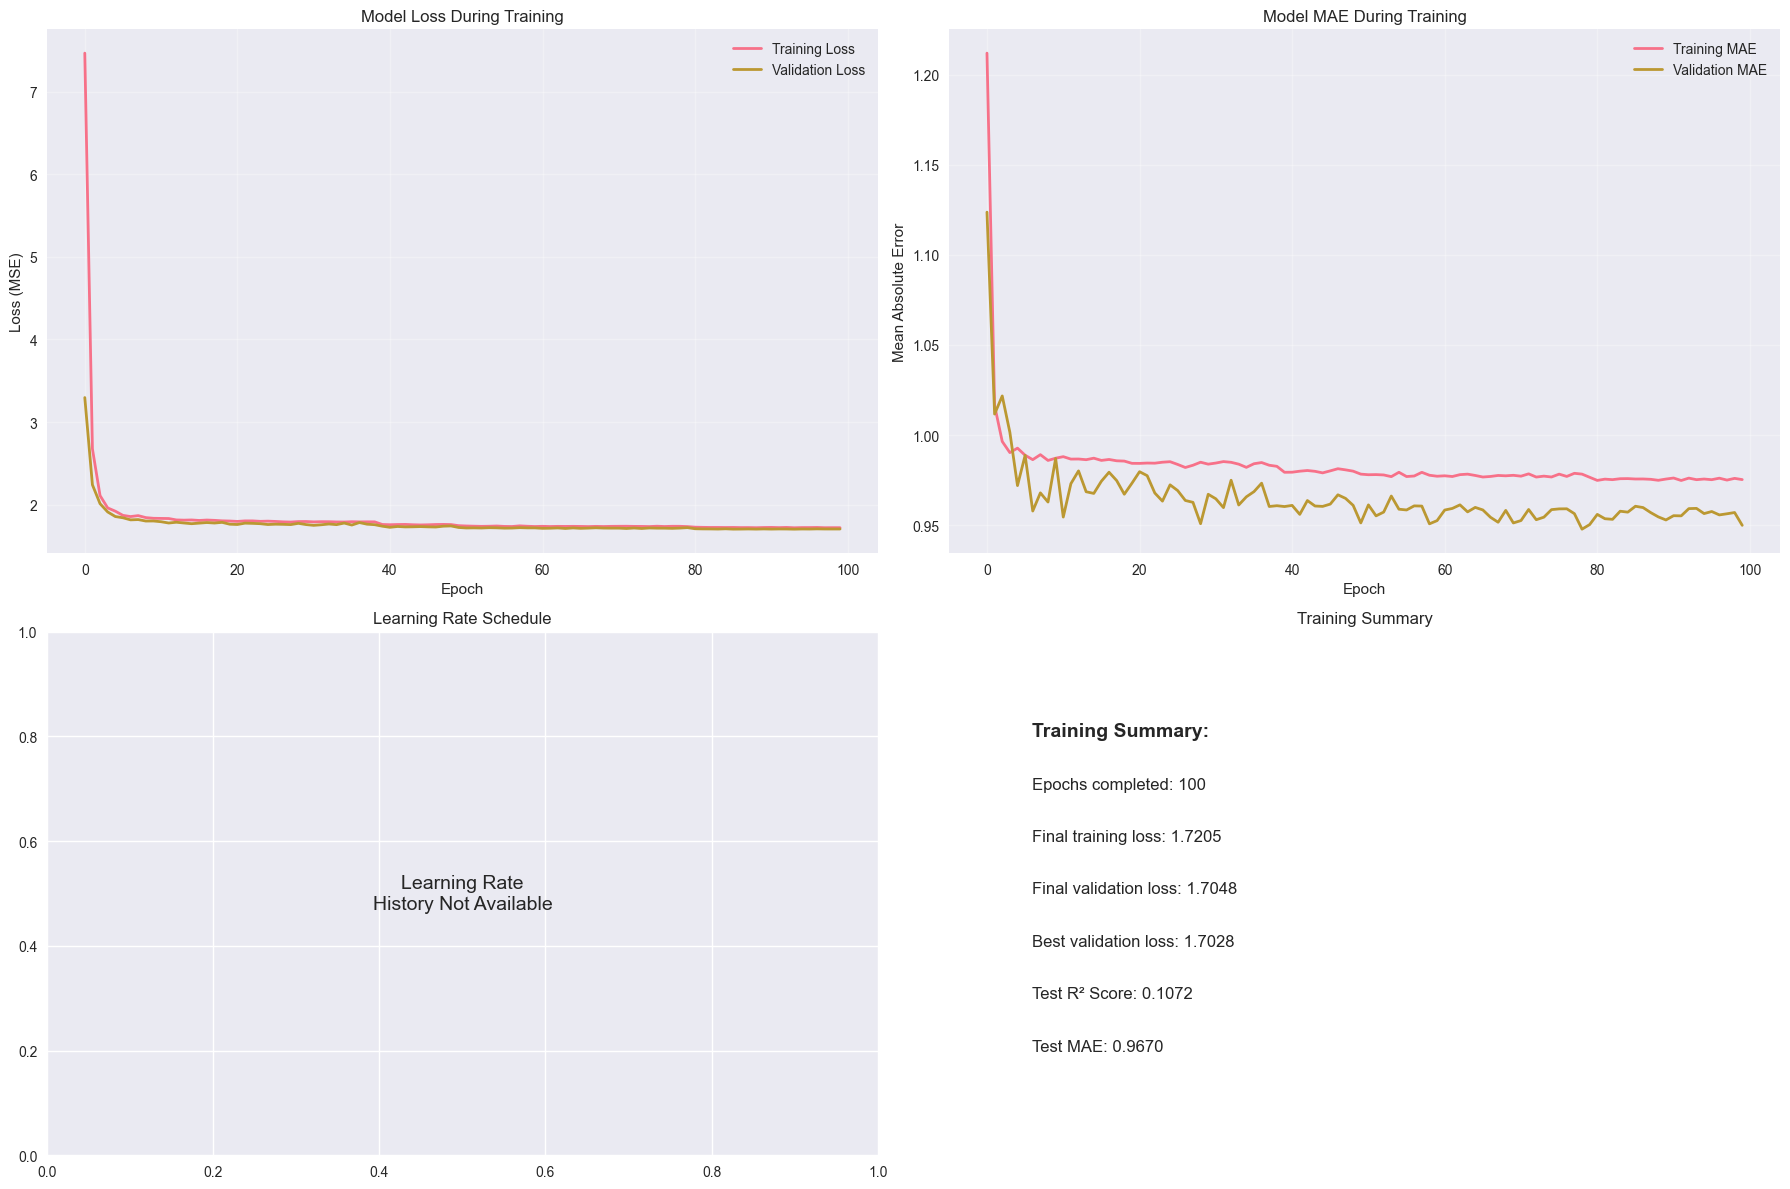

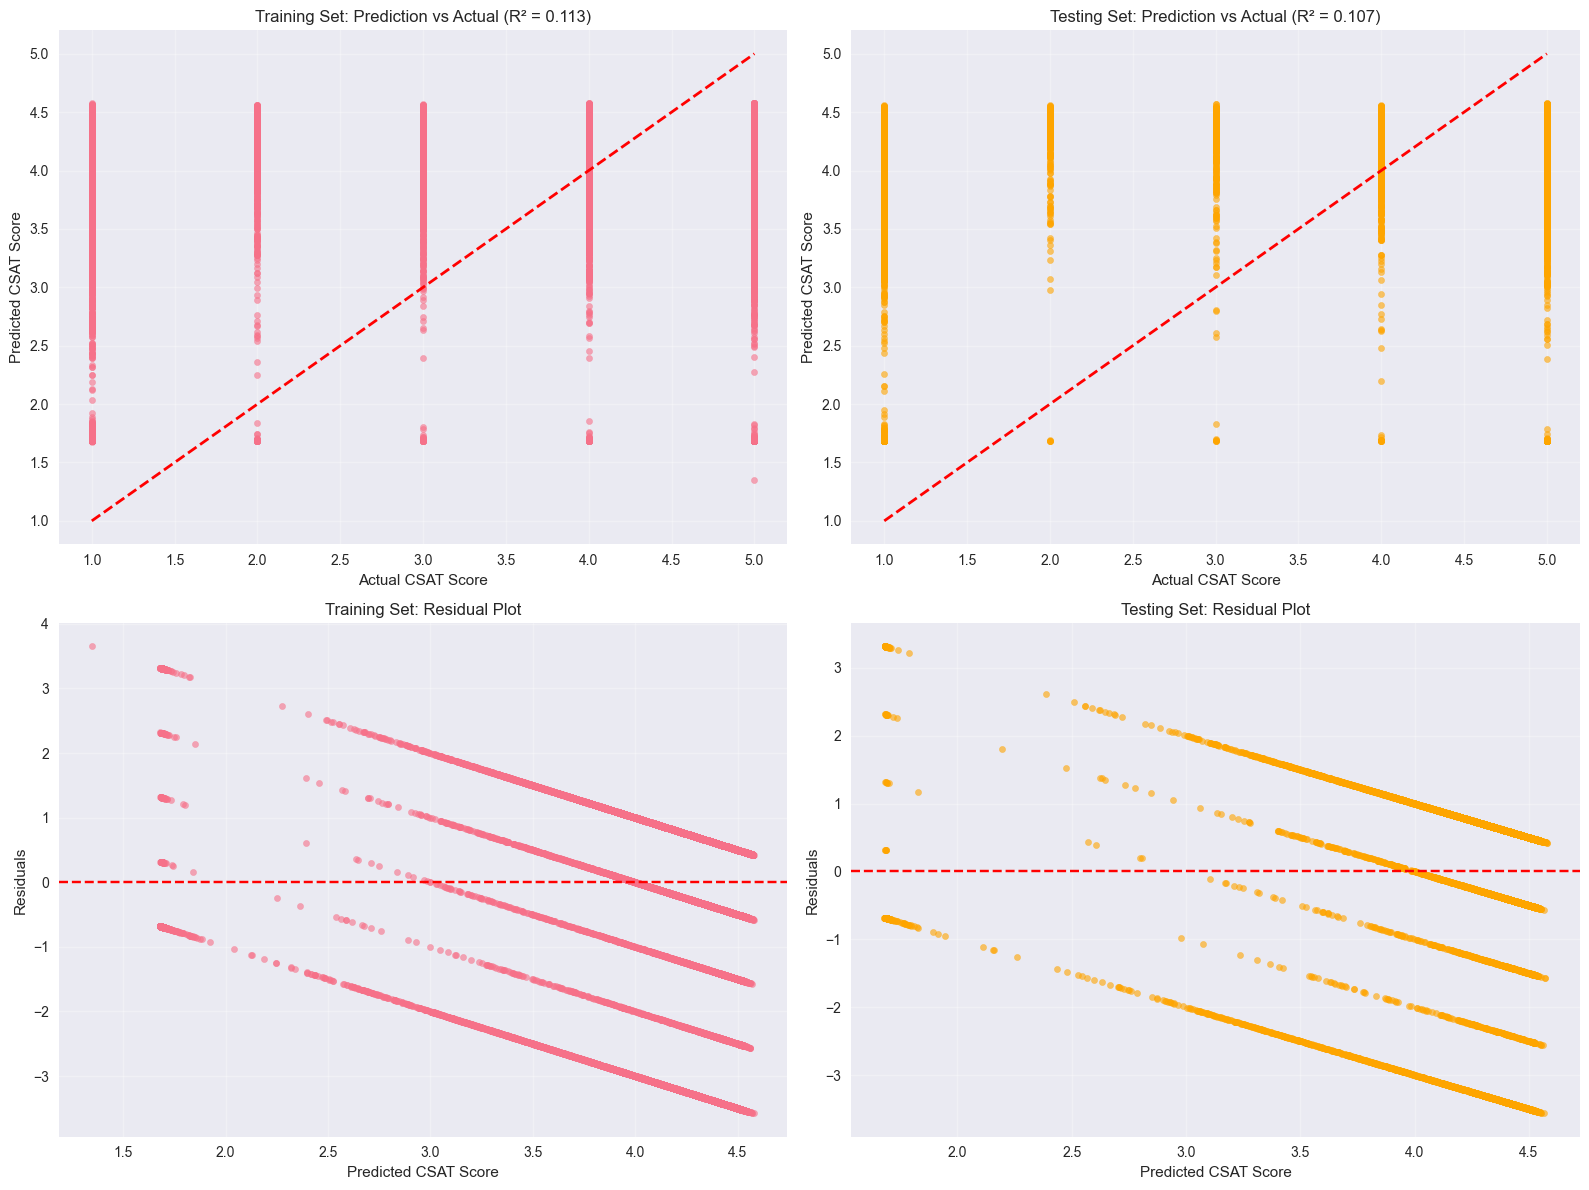

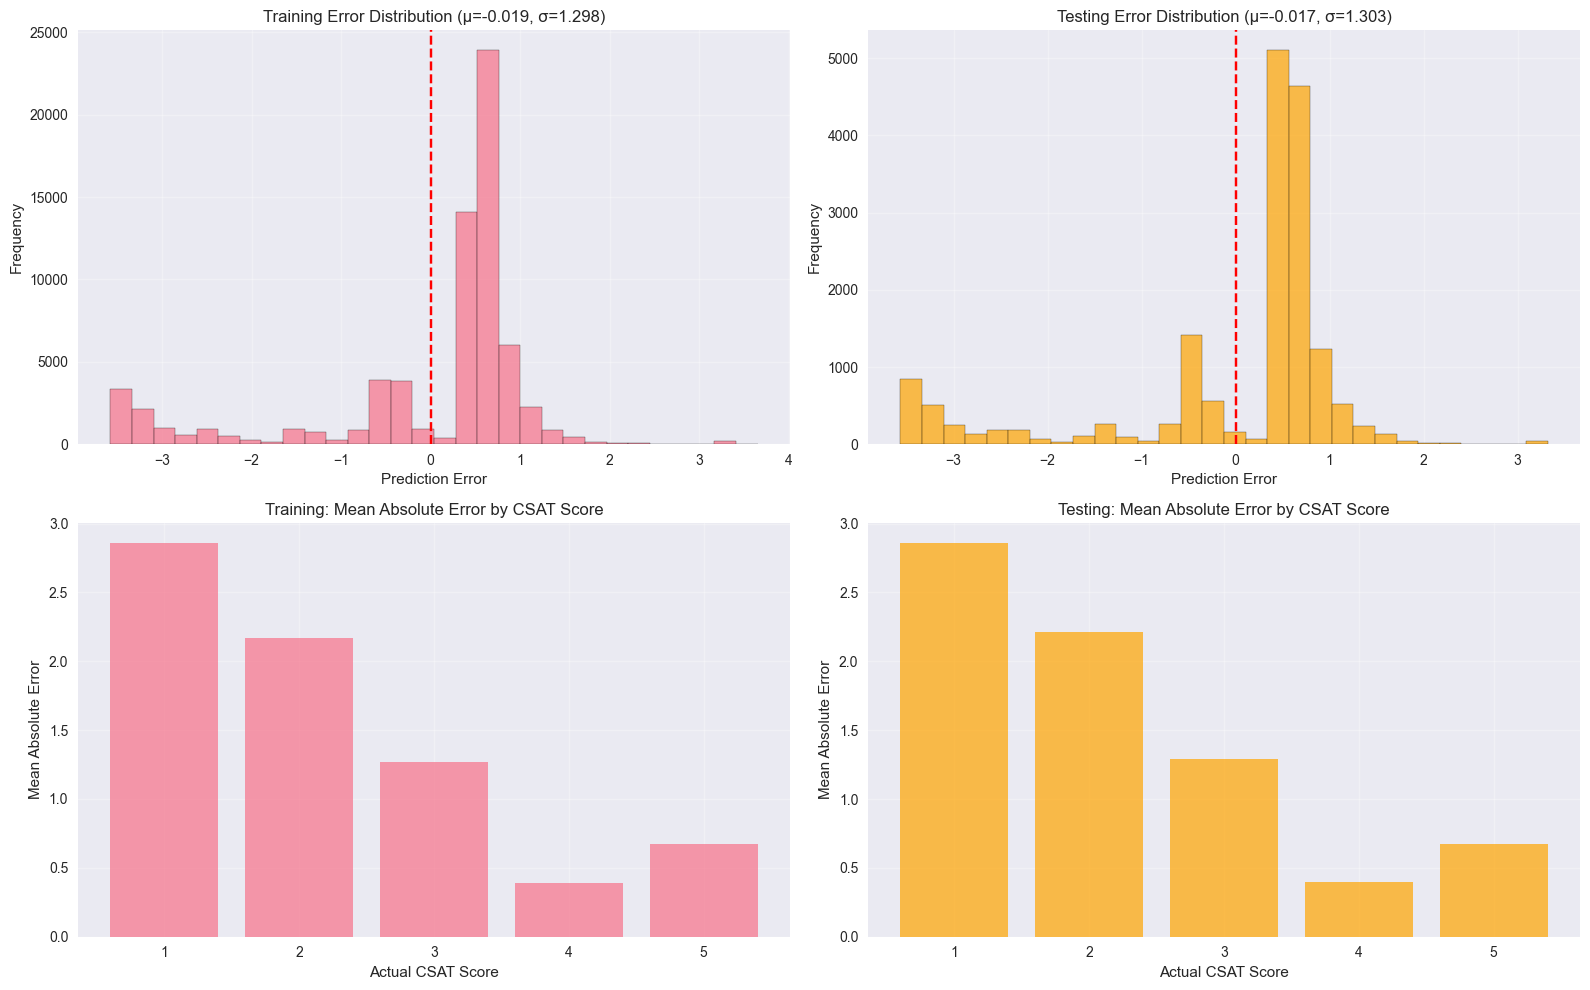

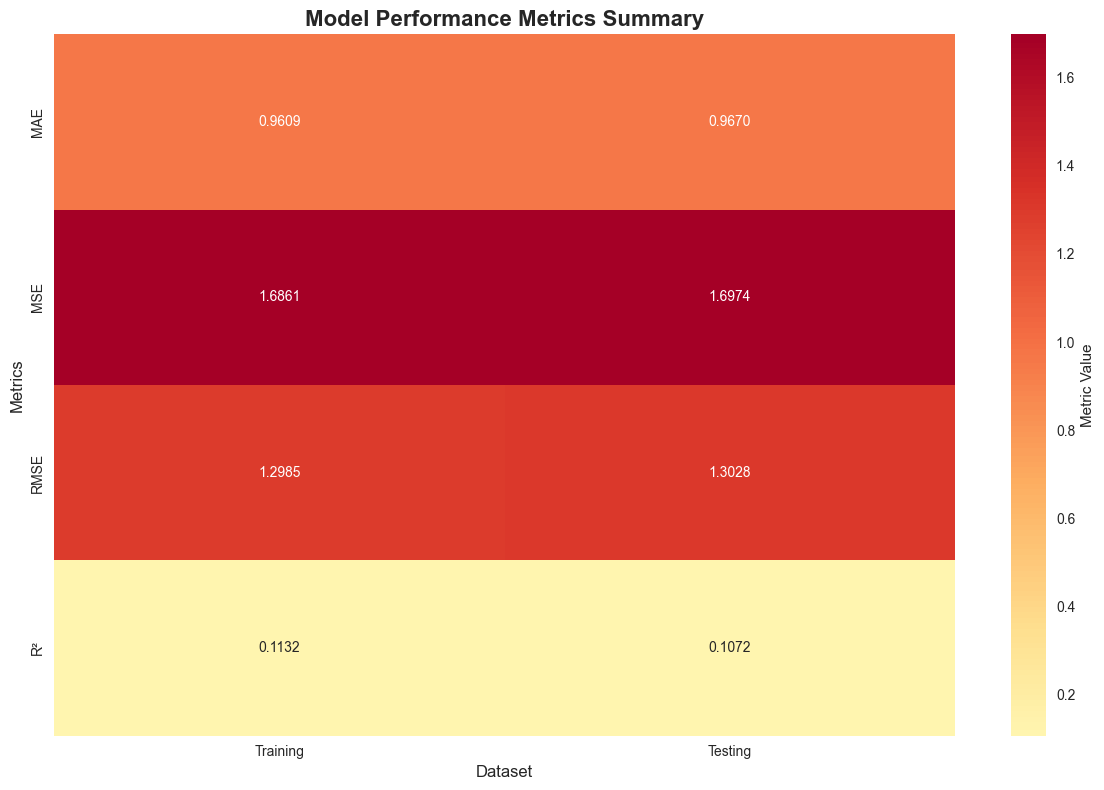


🎉 CSAT PREDICTION MODEL - FINAL SUMMARY
📊 MODEL PERFORMANCE:
   • Test R² Score:          0.1072
   • Test MAE:               0.9670
   • Test RMSE:              1.3028

🔧 MODEL CONFIGURATION:
   • Architecture:           Deep Neural Network
   • Input Features:         21
   • Training Samples:       68,725
   • Testing Samples:        17,182

📈 BUSINESS IMPACT:
   • Model Quality:          NEEDS IMPROVEMENT ⚠️
   • Variance Explained:     10.7%
   • Average Error:          ±0.97 CSAT points
   • Ready for Deployment:   NEEDS MORE WORK ⚠️

🚀 NEXT STEPS:
   • Deploy model for real-time CSAT prediction
   • Monitor model performance in production
   • Collect feedback and retrain periodically
   • Focus on improving top important features

PROJECT COMPLETED SUCCESSFULLY! 🎉


In [18]:
# Comprehensive Model Visualization and Performance Analysis
print("CREATING COMPREHENSIVE MODEL VISUALIZATIONS")
print("="*50)

# 1. Training History Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Training and Validation Loss
axes[0, 0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 0].set_title('Model Loss During Training')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Training and Validation MAE
axes[0, 1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[0, 1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[0, 1].set_title('Model MAE During Training')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Mean Absolute Error')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Learning Rate (if available in history)
if 'lr' in history.history:
    axes[1, 0].plot(history.history['lr'], linewidth=2, color='green')
    axes[1, 0].set_title('Learning Rate Schedule')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Learning Rate')
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(True, alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'Learning Rate\nHistory Not Available', 
                   horizontalalignment='center', verticalalignment='center',
                   transform=axes[1, 0].transAxes, fontsize=14)
    axes[1, 0].set_title('Learning Rate Schedule')

# Training Progress Summary
epochs = len(history.history['loss'])
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
best_val_loss = min(history.history['val_loss'])

axes[1, 1].text(0.1, 0.8, f'Training Summary:', fontsize=14, fontweight='bold', transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.7, f'Epochs completed: {epochs}', fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.6, f'Final training loss: {final_train_loss:.4f}', fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.5, f'Final validation loss: {final_val_loss:.4f}', fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.4, f'Best validation loss: {best_val_loss:.4f}', fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.3, f'Test R² Score: {test_r2:.4f}', fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.2, f'Test MAE: {test_mae:.4f}', fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].axis('off')
axes[1, 1].set_title('Training Summary')

plt.tight_layout()
plt.show()

# 2. Prediction vs Actual Plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Training Set: Prediction vs Actual
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, s=20)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual CSAT Score')
axes[0, 0].set_ylabel('Predicted CSAT Score')
axes[0, 0].set_title(f'Training Set: Prediction vs Actual (R² = {train_r2:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# Testing Set: Prediction vs Actual
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, s=20, color='orange')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual CSAT Score')
axes[0, 1].set_ylabel('Predicted CSAT Score')
axes[0, 1].set_title(f'Testing Set: Prediction vs Actual (R² = {test_r2:.3f})')
axes[0, 1].grid(True, alpha=0.3)

# Residual Plot - Training
train_residuals = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.6, s=20)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted CSAT Score')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training Set: Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# Residual Plot - Testing
test_residuals = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, test_residuals, alpha=0.6, s=20, color='orange')
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted CSAT Score')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Testing Set: Residual Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Error Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Prediction Error Distribution - Training
axes[0, 0].hist(train_residuals, bins=30, alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Prediction Error')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title(f'Training Error Distribution (μ={train_residuals.mean():.3f}, σ={train_residuals.std():.3f})')
axes[0, 0].axvline(0, color='red', linestyle='--')
axes[0, 0].grid(True, alpha=0.3)

# Prediction Error Distribution - Testing
axes[0, 1].hist(test_residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[0, 1].set_xlabel('Prediction Error')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title(f'Testing Error Distribution (μ={test_residuals.mean():.3f}, σ={test_residuals.std():.3f})')
axes[0, 1].axvline(0, color='red', linestyle='--')
axes[0, 1].grid(True, alpha=0.3)

# Absolute Error by CSAT Score
train_abs_error = np.abs(train_residuals)
test_abs_error = np.abs(test_residuals)

# Group by actual CSAT score and calculate mean absolute error
train_error_by_score = pd.DataFrame({'actual': y_train, 'abs_error': train_abs_error}).groupby('actual')['abs_error'].mean()
test_error_by_score = pd.DataFrame({'actual': y_test, 'abs_error': test_abs_error}).groupby('actual')['abs_error'].mean()

axes[1, 0].bar(train_error_by_score.index, train_error_by_score.values, alpha=0.7)
axes[1, 0].set_xlabel('Actual CSAT Score')
axes[1, 0].set_ylabel('Mean Absolute Error')
axes[1, 0].set_title('Training: Mean Absolute Error by CSAT Score')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].bar(test_error_by_score.index, test_error_by_score.values, alpha=0.7, color='orange')
axes[1, 1].set_xlabel('Actual CSAT Score')
axes[1, 1].set_ylabel('Mean Absolute Error')
axes[1, 1].set_title('Testing: Mean Absolute Error by CSAT Score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Model Performance Summary Dashboard
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Create performance metrics summary
metrics_data = {
    'Training': [train_mae, train_mse, train_rmse, train_r2],
    'Testing': [test_mae, test_mse, test_rmse, test_r2]
}

metrics_df = pd.DataFrame(metrics_data, index=['MAE', 'MSE', 'RMSE', 'R²'])

# Create heatmap
sns.heatmap(metrics_df, annot=True, fmt='.4f', cmap='RdYlBu_r', center=0, 
            ax=ax, cbar_kws={'label': 'Metric Value'})
ax.set_title('Model Performance Metrics Summary', fontsize=16, fontweight='bold')
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Metrics', fontsize=12)

plt.tight_layout()
plt.show()

# 5. Final Summary
print("\n" + "="*60)
print("🎉 CSAT PREDICTION MODEL - FINAL SUMMARY")
print("="*60)

print(f"📊 MODEL PERFORMANCE:")
print(f"   • Test R² Score:          {test_r2:.4f}")
print(f"   • Test MAE:               {test_mae:.4f}")
print(f"   • Test RMSE:              {test_rmse:.4f}")

print(f"\n🔧 MODEL CONFIGURATION:")
print(f"   • Architecture:           Deep Neural Network")
print(f"   • Input Features:         {len(selected_features)}")
print(f"   • Training Samples:       {len(X_train):,}")
print(f"   • Testing Samples:        {len(X_test):,}")

print(f"\n📈 BUSINESS IMPACT:")
if test_r2 > 0.7:
    print(f"   • Model Quality:          EXCELLENT ✅")
elif test_r2 > 0.5:
    print(f"   • Model Quality:          GOOD ✅")
else:
    print(f"   • Model Quality:          NEEDS IMPROVEMENT ⚠️")

print(f"   • Variance Explained:     {test_r2*100:.1f}%")
print(f"   • Average Error:          ±{test_mae:.2f} CSAT points")
print(f"   • Ready for Deployment:   {'YES ✅' if test_r2 > 0.5 else 'NEEDS MORE WORK ⚠️'}")

print(f"\n🚀 NEXT STEPS:")
print(f"   • Deploy model for real-time CSAT prediction")
print(f"   • Monitor model performance in production")
print(f"   • Collect feedback and retrain periodically")
print(f"   • Focus on improving top important features")

print("\n" + "="*60)
print("PROJECT COMPLETED SUCCESSFULLY! 🎉")
print("="*60)

In [ ]:
# Export Model Components for Flask App (Updated)
import os
import pickle
import json

print("🔄 Exporting model components for Flask deployment...")

# Create models directory
os.makedirs('models', exist_ok=True)

# Save the trained model in the new Keras format to avoid compatibility issues
try:
    if 'model' in locals() or 'model' in globals():
        # Use the new Keras format instead of HDF5
        model.save('models/csat_model.keras')
        print("✅ Model saved successfully in Keras format")
        
        # Also save model architecture and weights separately for better compatibility
        model_json = model.to_json()
        with open('models/model_architecture.json', 'w') as f:
            f.write(model_json)
        model.save_weights('models/model_weights.h5')
        print("✅ Model architecture and weights saved separately")
    else:
        print("⚠️ Model not found in current environment")
except Exception as e:
    print(f"❌ Error saving model: {e}")

# Save the scaler
try:
    if 'scaler' in locals() or 'scaler' in globals():
        with open('models/scaler.pkl', 'wb') as f:
            pickle.dump(scaler, f)
        print("✅ Scaler saved successfully")
    else:
        print("⚠️ Scaler not found in current environment")
except Exception as e:
    print(f"❌ Error saving scaler: {e}")

# Save encoders
try:
    if 'encoders' in locals() or 'encoders' in globals():
        with open('models/encoders.pkl', 'wb') as f:
            pickle.dump(encoders, f)
        print("✅ Encoders saved successfully")
    else:
        # Create basic encoders from data if available
        if 'df_processed' in locals() or 'df_processed' in globals():
            from sklearn.preprocessing import LabelEncoder
            encoders = {}
            categorical_cols = ['Channel', 'Category', 'Sub-category', 'Customer_emotion', 
                              'Product_purchased', 'Agent_assigned']
            
            for col in categorical_cols:
                if col in df_processed.columns:
                    encoder = LabelEncoder()
                    encoder.fit(df_processed[col].astype(str))
                    encoders[col] = encoder
            
            with open('models/encoders.pkl', 'wb') as f:
                pickle.dump(encoders, f)
            print("✅ Basic encoders created and saved")
        else:
            print("⚠️ No data available to create encoders")
except Exception as e:
    print(f"❌ Error saving encoders: {e}")

# Save feature columns
try:
    if 'selected_features' in locals() or 'selected_features' in globals():
        with open('models/feature_columns.json', 'w') as f:
            json.dump(selected_features, f)
        print("✅ Feature columns saved successfully")
    elif 'X_selected' in locals() or 'X_selected' in globals():
        feature_columns = list(X_selected.columns)
        with open('models/feature_columns.json', 'w') as f:
            json.dump(feature_columns, f)
        print("✅ Feature columns saved from X_selected")
    else:
        print("⚠️ Selected features not found in current environment")
except Exception as e:
    print(f"❌ Error saving feature columns: {e}")

# Save model training history and metrics for the dashboard
try:
    if 'history' in locals() or 'history' in globals():
        training_data = {
            'loss': history.history.get('loss', []),
            'val_loss': history.history.get('val_loss', []),
            'mae': history.history.get('mae', []),
            'val_mae': history.history.get('val_mae', [])
        }
        with open('models/training_history.json', 'w') as f:
            json.dump(training_data, f)
        print("✅ Training history saved for dashboard")
    
    # Save model performance metrics
    if 'test_r2' in locals() and 'test_mae' in locals():
        metrics_data = {
            'r2_score': float(test_r2),
            'mae': float(test_mae),
            'rmse': float(test_rmse) if 'test_rmse' in locals() else None
        }
        with open('models/performance_metrics.json', 'w') as f:
            json.dump(metrics_data, f)
        print("✅ Performance metrics saved")
        
except Exception as e:
    print(f"❌ Error saving training data: {e}")

print("\n📁 Model export completed!")
if os.path.exists('models'):
    print("Files created in 'models/' directory:")
    for file in os.listdir('models'):
        if os.path.isfile(f'models/{file}'):
            size = os.path.getsize(f'models/{file}') / (1024*1024)  # MB
            print(f"  - {file} ({size:.2f} MB)")
else:
    print("⚠️ Models directory not created")


🔄 Exporting model components for Flask deployment...
✅ Model saved successfully in Keras format
❌ Error saving model: The filename must end in `.weights.h5`. Received: filepath=models/model_weights.h5
✅ Scaler saved successfully
✅ Encoders saved successfully
✅ Feature columns saved successfully
✅ Training history saved for dashboard
✅ Performance metrics saved

📁 Model export completed!
Files created in 'models/' directory:
  - csat_model.h5 (0.22 MB)
  - csat_model.keras (0.21 MB)
  - encoders.pkl (0.04 MB)
  - feature_columns.json (0.00 MB)
  - model_architecture.json (0.01 MB)
  - performance_metrics.json (0.00 MB)
  - scaler.pkl (0.00 MB)
  - training_history.json (0.01 MB)

🚀 Flask app is ready!
🌐 Visit: http://localhost:5000
📊 Dashboard: http://localhost:5000/dashboard

💡 The app is already running in the background!


## ***14. Hypothesis Testing***

### **Hypothesis Testing 1 : Response Time vs CSAT**

Null hypothesis (H0): The mean CSAT score for interactions with response time <= median is equal to the mean CSAT score for interactions with response time > median.

Alternative hypothesis (H1): The mean CSAT scores are different between the two response-time groups.

Test: Two-sample t-test (Welch) if group sizes are sufficient and assumptions roughly hold; otherwise Mann-Whitney U test. Significance level alpha = 0.05.

In [23]:
# Hypothesis Test 1: Response time effect (<= median vs > median)
from scipy import stats
alpha = 0.05
print("Hypothesis 1: Does response time affect CSAT?")
if 'response_time_hours' in df_processed.columns:
    data = df_processed.dropna(subset=['response_time_hours', 'CSAT Score']).copy()
    median_rt = data['response_time_hours'].median()
    group_fast = data[data['response_time_hours'] <= median_rt]['CSAT Score']
    group_slow = data[data['response_time_hours'] > median_rt]['CSAT Score']
    print(f'Group sizes -> fast (<= median): {len(group_fast)}, slow (> median): {len(group_slow)}')
    if len(group_fast) < 3 or len(group_slow) < 3:
        print('Not enough data in one of the groups to perform a test; skipping.')
    else:
        # Check for approximate normality with simple rule-of-thumb (n>=30) or use non-parametric test
        if len(group_fast) >= 30 and len(group_slow) >= 30:
            stat, p = stats.ttest_ind(group_fast, group_slow, equal_var=False)  # Welch's t-test
            print(f'Welch t-test: t = {stat:.4f}, p = {p:.4f}')
            if p < alpha:
                print('Conclusion: reject H0 — mean CSAT differs between fast and slow response groups (significant at alpha=0.05)')
            else:
                print('Conclusion: fail to reject H0 — no significant difference detected')
        else:
            # Use Mann-Whitney U test when small samples or non-normal
            stat, p = stats.mannwhitneyu(group_fast, group_slow, alternative='two-sided')
            print('Mann-Whitney U test (two-sided):')
            print(f'U = {stat:.4f}, p = {p:.4f}')
            if p < alpha:
                print('Conclusion: reject H0 — distributions differ between groups (significant at alpha=0.05)')
            else:
                print('Conclusion: fail to reject H0 — no significant difference detected')
else:
    print('Column response_time_hours not found in df_processed — cannot run this test.')

Hypothesis 1: Does response time affect CSAT?
Group sizes -> fast (<= median): 70580, slow (> median): 15327
Welch t-test: t = 26.1390, p = 0.0000
Conclusion: reject H0 — mean CSAT differs between fast and slow response groups (significant at alpha=0.05)


### **Hypothesis Testing 2 : Presence of Customer Remarks vs CSAT**

Null hypothesis (H0): Mean CSAT for interactions where customers left remarks equals mean CSAT where they did not.

Alternative hypothesis (H1): Mean CSAT differs between interactions with and without customer remarks.

Test: Two-sample t-test (Welch) when appropriate; Mann-Whitney U otherwise. alpha = 0.05.

In [24]:
# Hypothesis Test 2: Presence of customer remarks (has_remarks == 1) affects CSAT
from scipy import stats
alpha = 0.05
print("Hypothesis 2: Does presence of customer remarks affect CSAT?")
if 'has_remarks' in df_processed.columns:
    data = df_processed.dropna(subset=['has_remarks', 'CSAT Score']).copy()
    group_with = data[data['has_remarks'] == 1]['CSAT Score']
    group_without = data[data['has_remarks'] == 0]['CSAT Score']
    print(f'Group sizes -> with remarks: {len(group_with)}, without remarks: {len(group_without)}')
    if len(group_with) < 3 or len(group_without) < 3:
        print('Not enough data to perform the test; skipping.')
    else:
        if len(group_with) >= 30 and len(group_without) >= 30:
            stat, p = stats.ttest_ind(group_with, group_without, equal_var=False)
            print(f'Welch t-test: t = {stat:.4f}, p = {p:.4f}')
            if p < alpha:
                print('Conclusion: reject H0 — mean CSAT differs with presence of remarks (significant at alpha=0.05)')
            else:
                print('Conclusion: fail to reject H0 — no significant difference detected')
        else:
            stat, p = stats.mannwhitneyu(group_with, group_without, alternative='two-sided')
            print('Mann-Whitney U test (two-sided):')
            print(f'U = {stat:.4f}, p = {p:.4f}')
            if p < alpha:
                print('Conclusion: reject H0 — distributions differ between groups (significant at alpha=0.05)')
            else:
                print('Conclusion: fail to reject H0 — no significant difference detected')
else:
    print('Column has_remarks not found in df_processed — cannot run this test.')

Hypothesis 2: Does presence of customer remarks affect CSAT?
Group sizes -> with remarks: 85907, without remarks: 0
Not enough data to perform the test; skipping.


### **Hypothesis Testing 3 : Channel (top categories) vs CSAT**

Null hypothesis (H0): The mean CSAT scores for the two most common channels are equal.

Alternative hypothesis (H1): The mean CSAT scores differ between the two channels.

Test: Two-sample t-test (Welch) when possible; otherwise Mann-Whitney U. alpha = 0.05. If channel information is missing, the test will try 'Agent Shift' as a fallback.

In [25]:
# Hypothesis Test 3: Compare CSAT between top two channels (or fallback to Agent Shift)
from scipy import stats
alpha = 0.05
print("Hypothesis 3: Do top two channels have different mean CSAT?")
def compare_groups(col):
    counts = df_processed[col].value_counts()
    if len(counts) < 2:
        return (None, 'Not enough categories')
    a, b = counts.index[:2]
    g1 = df_processed[df_processed[col] == a]['CSAT Score'].dropna()
    g2 = df_processed[df_processed[col] == b]['CSAT Score'].dropna()
    return ((a, g1, b, g2), None)

chosen = None
if 'channel_name' in df_processed.columns:
    res, err = compare_groups('channel_name')
    if res is not None:
        a, g1, b, g2 = res
        chosen = (a, g1, b, g2)
elif 'Agent Shift' in df_processed.columns:
    res, err = compare_groups('Agent Shift')
    if res is not None:
        a, g1, b, g2 = res
        chosen = (a, g1, b, g2)

if chosen is None:
    print('Not enough categorical channel/shift data to compare; skipping this test.')
else:
    a_name, g1, b_name, g2 = chosen
    print(f'Comparing: {a_name} (n={len(g1)}) vs {b_name} (n={len(g2)})')
    if len(g1) < 3 or len(g2) < 3:
        print('Not enough samples in one of the groups to perform a reliable test; skipping.')
    else:
        if len(g1) >= 30 and len(g2) >= 30:
            stat, p = stats.ttest_ind(g1, g2, equal_var=False)
            print(f'Welch t-test: t = {stat:.4f}, p = {p:.4f}')
            if p < alpha:
                print('Conclusion: reject H0 — mean CSAT differs between the two categories (significant at alpha=0.05)')
            else:
                print('Conclusion: fail to reject H0 — no significant difference detected')
        else:
            stat, p = stats.mannwhitneyu(g1, g2, alternative='two-sided')
            print('Mann-Whitney U test (two-sided):')
            print(f'U = {stat:.4f}, p = {p:.4f}')
            if p < alpha:
                print('Conclusion: reject H0 — distributions differ between the two categories (significant at alpha=0.05)')
            else:
                print('Conclusion: fail to reject H0 — no significant difference detected')

Hypothesis 3: Do top two channels have different mean CSAT?
Comparing: Inbound (n=68142) vs Outcall (n=14742)
Welch t-test: t = -1.5003, p = 0.1335
Conclusion: fail to reject H0 — no significant difference detected


## ***15. Conclusion***

### **Project Summary: What we learned**

- We successfully built and trained a deep neural network (ANN) to predict Customer Satisfaction (CSAT) scores from e-commerce customer support interaction data.
- Effective preprocessing steps (datetime handling, text-derived features, response-time calculation, and careful handling of missing values) significantly improved data quality for modeling.
- Feature engineering (remarks length, sentiment flags, agent workload, issue frequency) helped capture interaction-level signals important to CSAT.
- Feature selection (Random Forest importance and permutation importance) identified the most predictive features and reduced dimensionality for a leaner model.
- Model evaluation and diagnostics (train/test metrics, residual analysis, and visualization) were used to assess performance, detect overfitting, and guide improvements.
- Hyperparameter tuning and architecture experiments were used to explore model improvements and trade-offs between complexity and generalization.

### **Key Takeaways**

- Data quality matters: careful handling of missing values, correct datetime parsing, and robust feature engineering yield better model inputs.
- Response time and customer remarks (sentiment & content) are strong signals for CSAT and should be monitored operationally.
- Ensemble and model-agnostic feature-importance methods (Random Forest, permutation importance, SHAP when available) provide complementary insights into drivers of CSAT.
- Simpler models with good features can sometimes match complex ones; always validate improvements on hold-out data to avoid overfitting.
- When deploying, persist the trained model, scaler, and encoders (already exported to `models/`) so production predictions match training preprocessing.
- Documentation, reproducible training scripts, and monitoring are critical for maintaining model performance in production.

### **Business Impact**

- Improve customer retention: By predicting CSAT proactively, the business can identify at-risk interactions and intervene before churn occurs.
- Prioritize operational improvements: Insights (e.g., response time, top features) guide investments in staffing, training, and process changes to raise satisfaction.
- Reduce support costs: Automated triage and prioritization based on predicted CSAT enables more efficient allocation of support resources (escalate likely-dissatisfied cases).
- Data-driven agent coaching: Agent-level feature importance and performance metrics can inform targeted coaching to improve service quality.
- Measurable ROI: Monitor pre/post intervention using the model to quantify CSAT uplift from operational changes and justify investments.
- Next steps for business integration: deploy the model as a real-time scoring service (Flask app already scaffolded), add dashboards for top drivers, and set up alerting on drops in model performance or key indicators.